In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, f1_score
from sklearn import tree
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
%%time
df=pd.read_csv('income_evaluation.csv')

Wall time: 49.9 ms


In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### For making the desired output string in BOLD

In [4]:
%%time
start='\033[1m'
end='\033[0;0m'

Wall time: 0 ns


### Functions Used For Analysis

In [5]:
%%time
     
# function for getting details of the dataframe
def details(df):
    print(start+'Shape of the Dataframe:'+end,df.shape,'\n')
    print(start+'Summary Of the dataframe:'+end,'\n')
    print(df.info(),'\n')
    print(start+'Statistical Summary of the Dataframe:'+end,'\n',df.describe(),'\n')
    print(start+'Checking for Null values in the dataframe:'+end,'\n',df.isnull().sum(),'\n')
    print(start+'Columns in dataframe:'+end,df.columns)
    
    
#function for getting insigt for each column values
def values_in_columns(df):
    for i in df.columns:
        print(start+'Column Name--->'+i+end)
        print('Number of Unique Values',df[i].nunique(),'\n')
        print('Count of each unique value \n',df[i].value_counts(),'\n')
        
        
        
# function for dropping duplicates        
def duplicate(df):
    if df.duplicated().sum()>0:
        print(start+'Dataframe contains duplicate values'+end,df.duplicated().sum())
        df.drop_duplicates(inplace=True,ignore_index=True)
        print('Details of dataframe after droping the Duplicate rows')
        details(df)
    else:
        print("Dataframe doesn't contains dublicate Values")
        
font = {'family': 'serif',
            'weight': 'normal',
            'size': 30,
            }
#function for ploting bar graph for each column of the dataframe
def plot_each_columns(data):
    for i in data.columns:
        if len(data[i].value_counts())>20:
            df = data[i].value_counts()[:20]
            plt.figure(figsize=(30,10))
            sns.barplot(x=df.index, y=df)
            plt.xticks(rotation=90,fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.title(i,fontdict=font)
            
        else:
            df = data[i].value_counts()
            plt.figure(figsize=(30,10))
            sns.barplot(x=df.index, y=df)
            plt.xticks(rotation=90,fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.title(i,fontdict=font)

#function for plotting countplot of each with repect to any specific column for column havind unique value less than 20
def plot_columns(data,hue_name):

    for i in data.columns:
    
        if len(data[i].value_counts())<20:
            f, ax = plt.subplots(figsize=(10, 8))
            ax = sns.countplot(x=i, hue=hue_name, data=df)
            ax.set_title("Frequency distribution of "+i+" variable wrt "+hue_name)
            plt.xticks(rotation=90,fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.show()

            
# function for plotting box plot of each numerical column
def boxplot_variable(data):
    for i in numerical:  
        f, ax = plt.subplots(figsize=(10, 8))
        ax = sns.boxplot(x=i,  data=data)
        ax.set_title("Box Plot of "+i)
        plt.xticks(rotation=90,fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.show()

        
#function for plotting boxplot of each numerical column with respect to specific columns
def boxplot_mult(df,x,hue_name):
    for i in numerical:  
        f, ax = plt.subplots(figsize=(10, 8))
        ax = sns.boxplot( x=x,y=i,hue=hue_name, data=df)
        ax.set_title("Box Plot of "+i+" variable wrt "+x)
        plt.xticks(rotation=90,fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.show()
        


Wall time: 0 ns


In [6]:
%%time

details(df)

Shape of the Dataframe: (32561, 15) 

Summary Of the dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None 

Sta

#### Interpretations
1. Data is not having null values<br>
2. Min age is 17 and Max age is 90<br>
3. Capital loss and capital gian contains its value more zero's 

In [7]:
%%time
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('-', '_')

categorical = []
numerical = []

for i in df.columns:
    if df[i].dtype=='O':
        categorical.append(i)
    else:
        numerical.append(i)
        

Wall time: 996 µs


In [8]:
%%time
duplicate(df)


Dataframe contains duplicate values 24
Details of dataframe after droping the Duplicate rows
Shape of the Dataframe: (32537, 15) 

Summary Of the dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 n

#### Interpretations
1. Number of duplicate values in dataframe is 24 which is being dropped

In [9]:
%%time
values_in_columns(df)


Column Name--->age
Number of Unique Values 73 

Count of each unique value 
 36    898
31    888
34    886
23    876
33    875
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64 

Column Name--->workclass
Number of Unique Values 9 

Count of each unique value 
  Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

Column Name--->fnlwgt
Number of Unique Values 21648 

Count of each unique value 
 123011    13
164190    13
203488    13
113364    12
148995    12
          ..
65078      1
68318      1
284211     1
312881     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64 

Column Name--->education
Number of Unique Values 16 

Count of each unique value 
  HS-grad         10494
 Some-college     7282
 Bachelors        5

#### Interpretations
1. workclass, occupation, native-country contains '?' as the value,will treat it as nan value <br>

In [10]:
%%time
df.replace({' ?':None},inplace=True)


Wall time: 18 ms


In [11]:
%%time
details(df)

Shape of the Dataframe: (32537, 15) 

Summary Of the dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  31955 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None 

Statistical Summary 

#### Interpretations
1. Now there are Null values in columns we will work on it in later part

Wall time: 700 ms


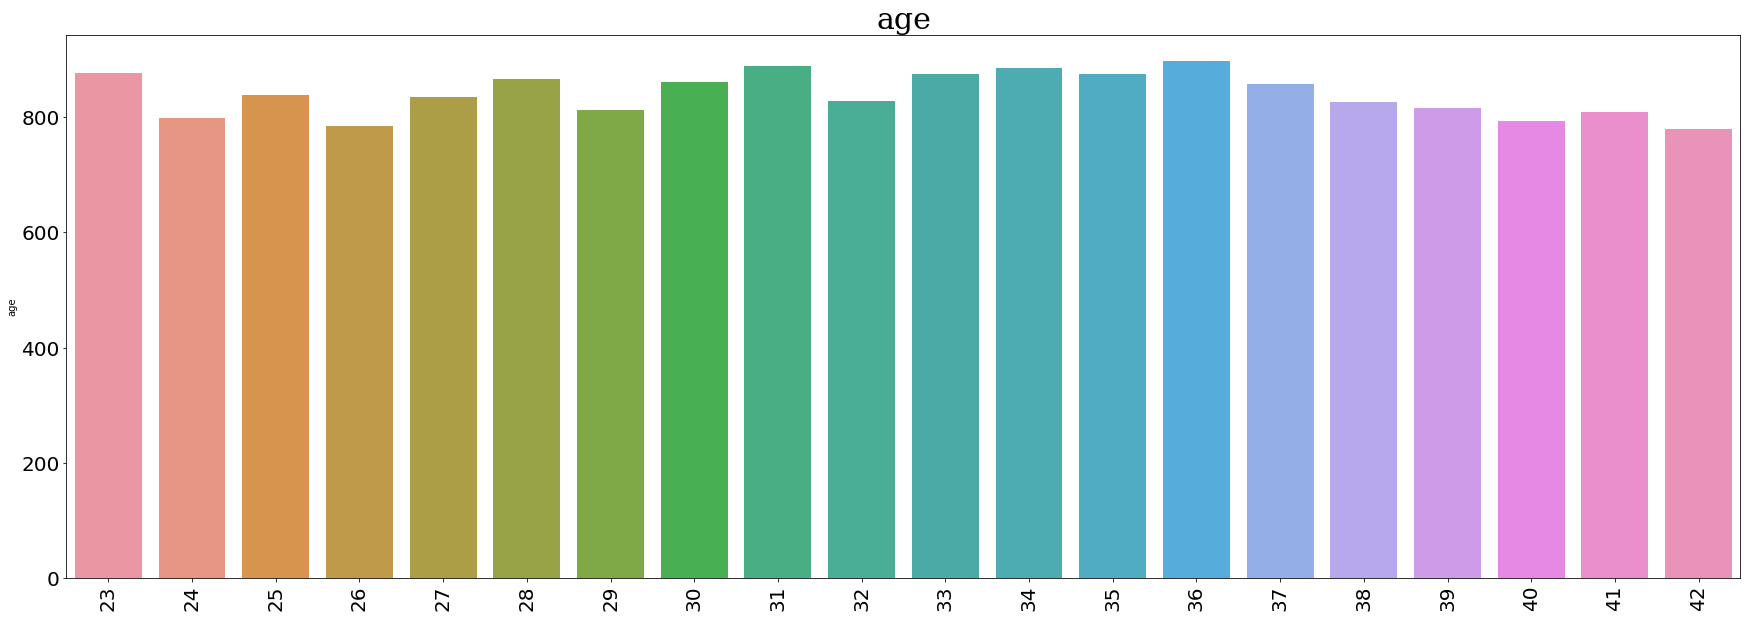

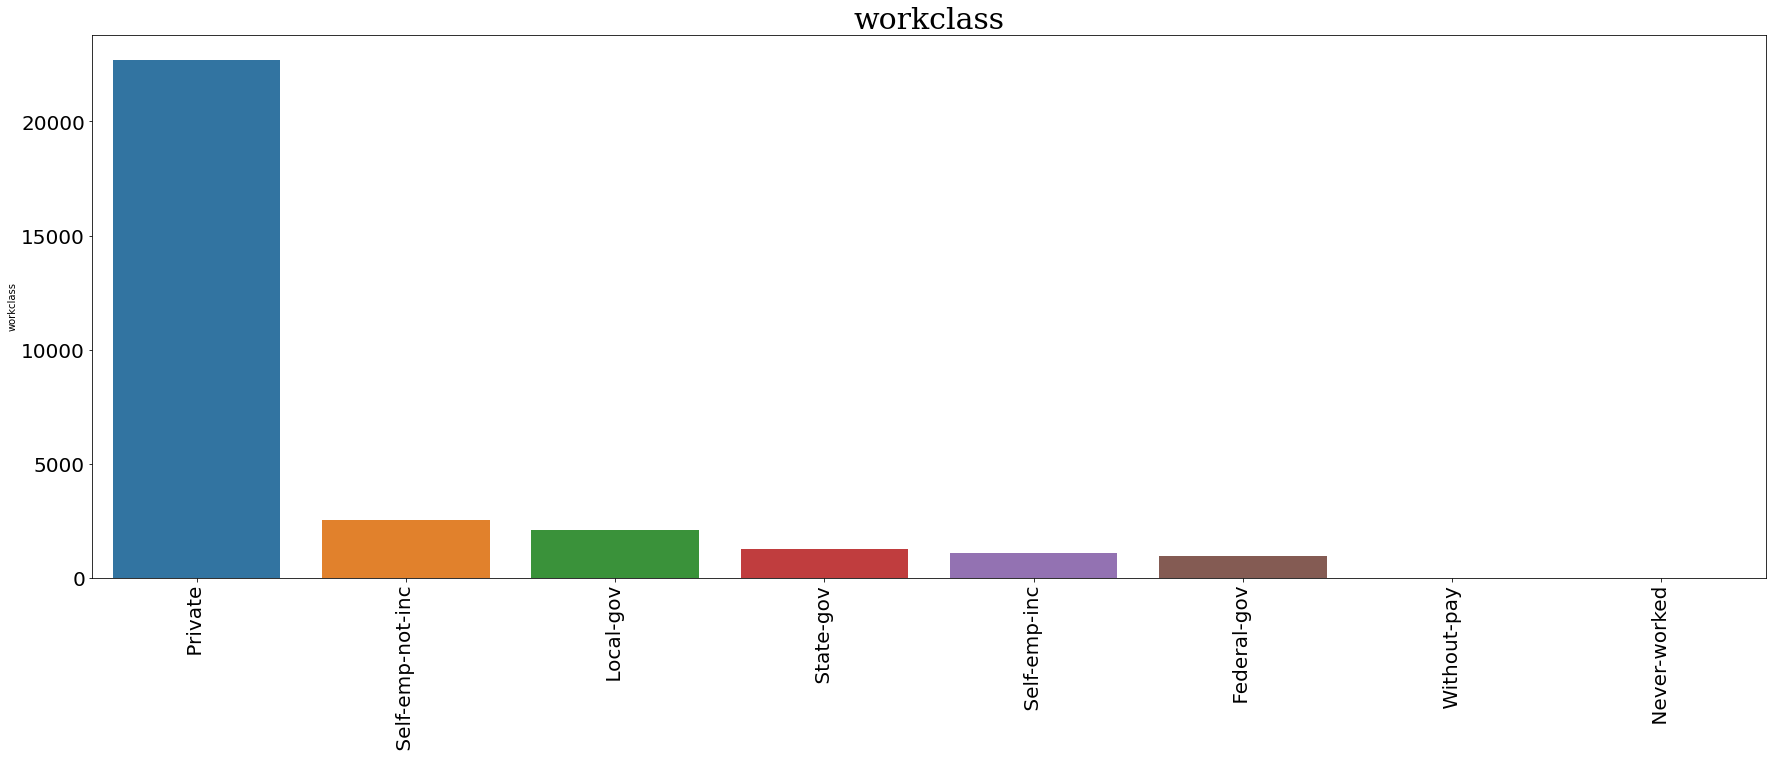

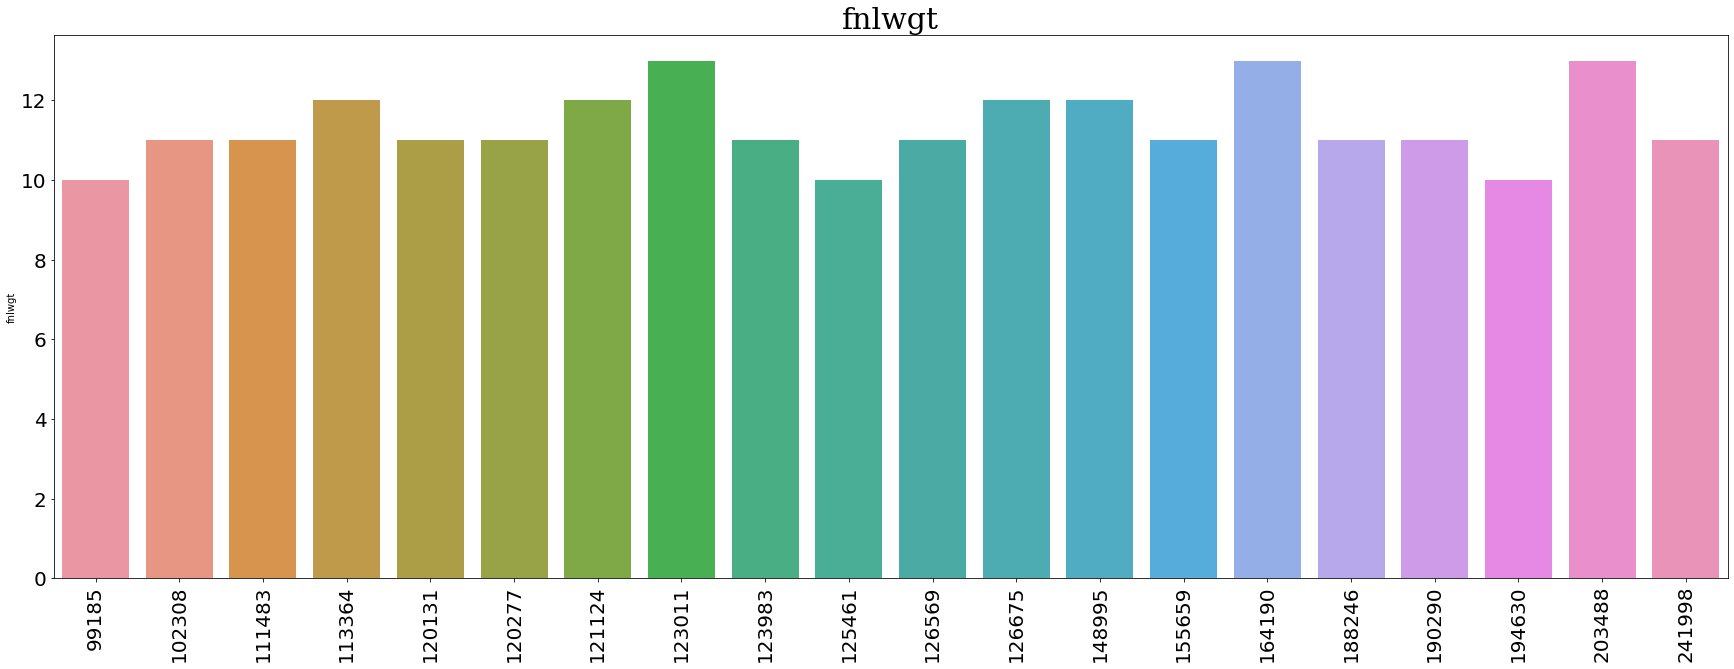

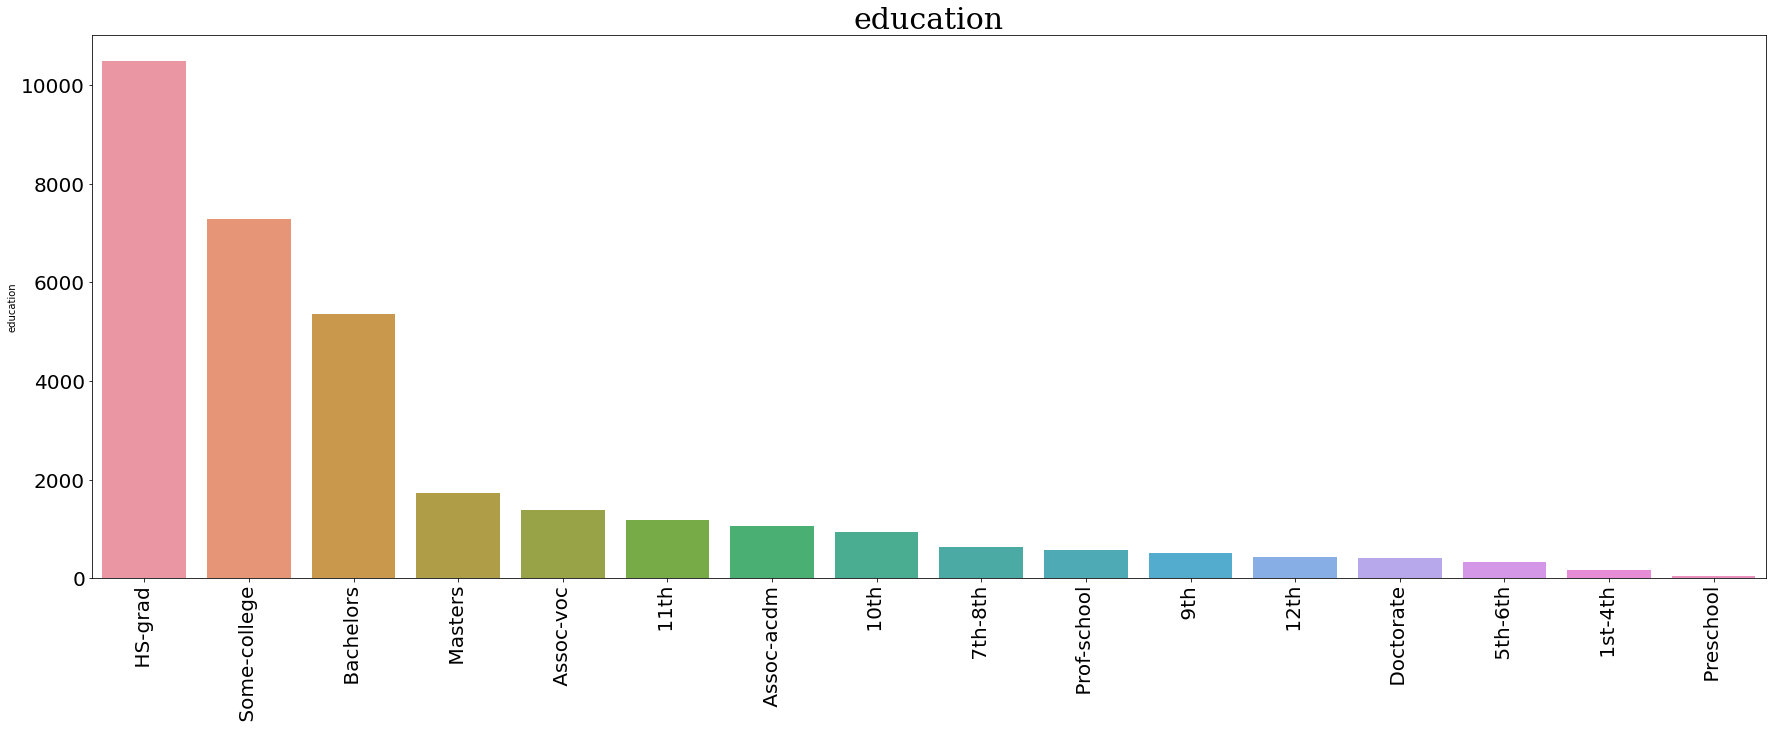

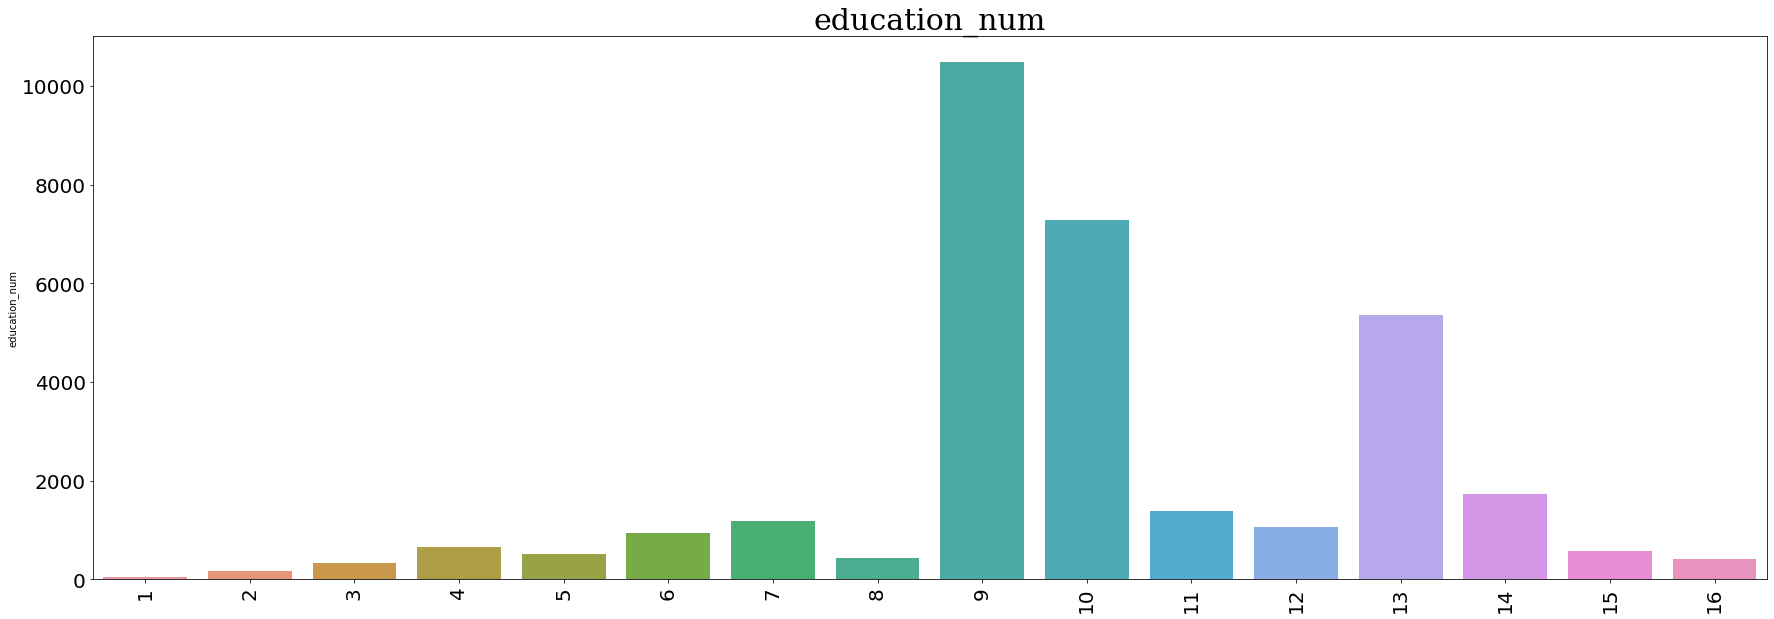

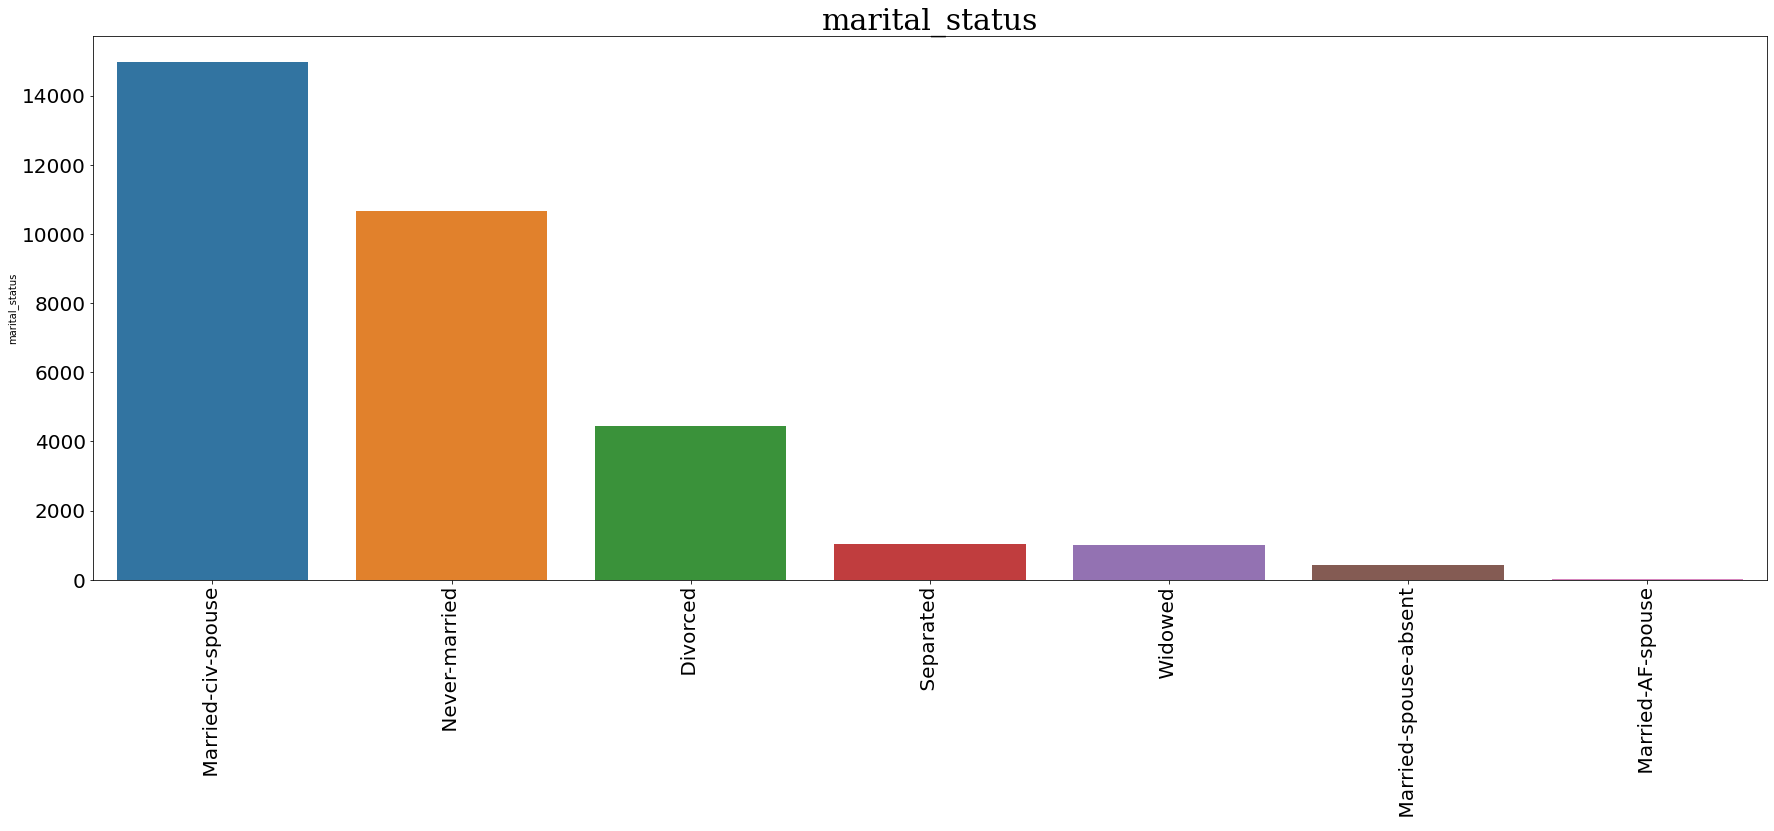

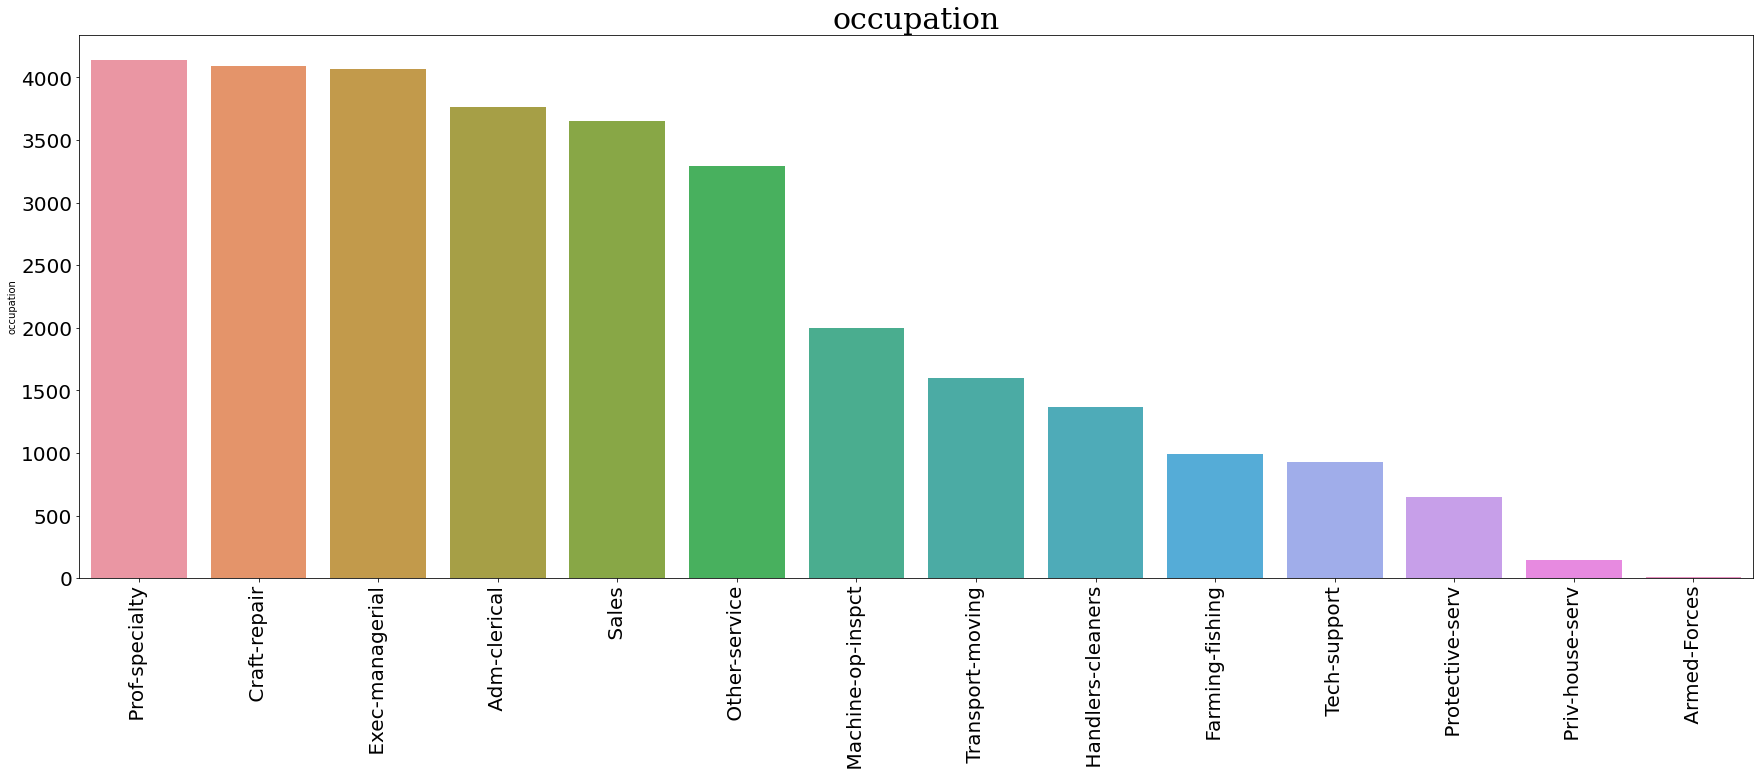

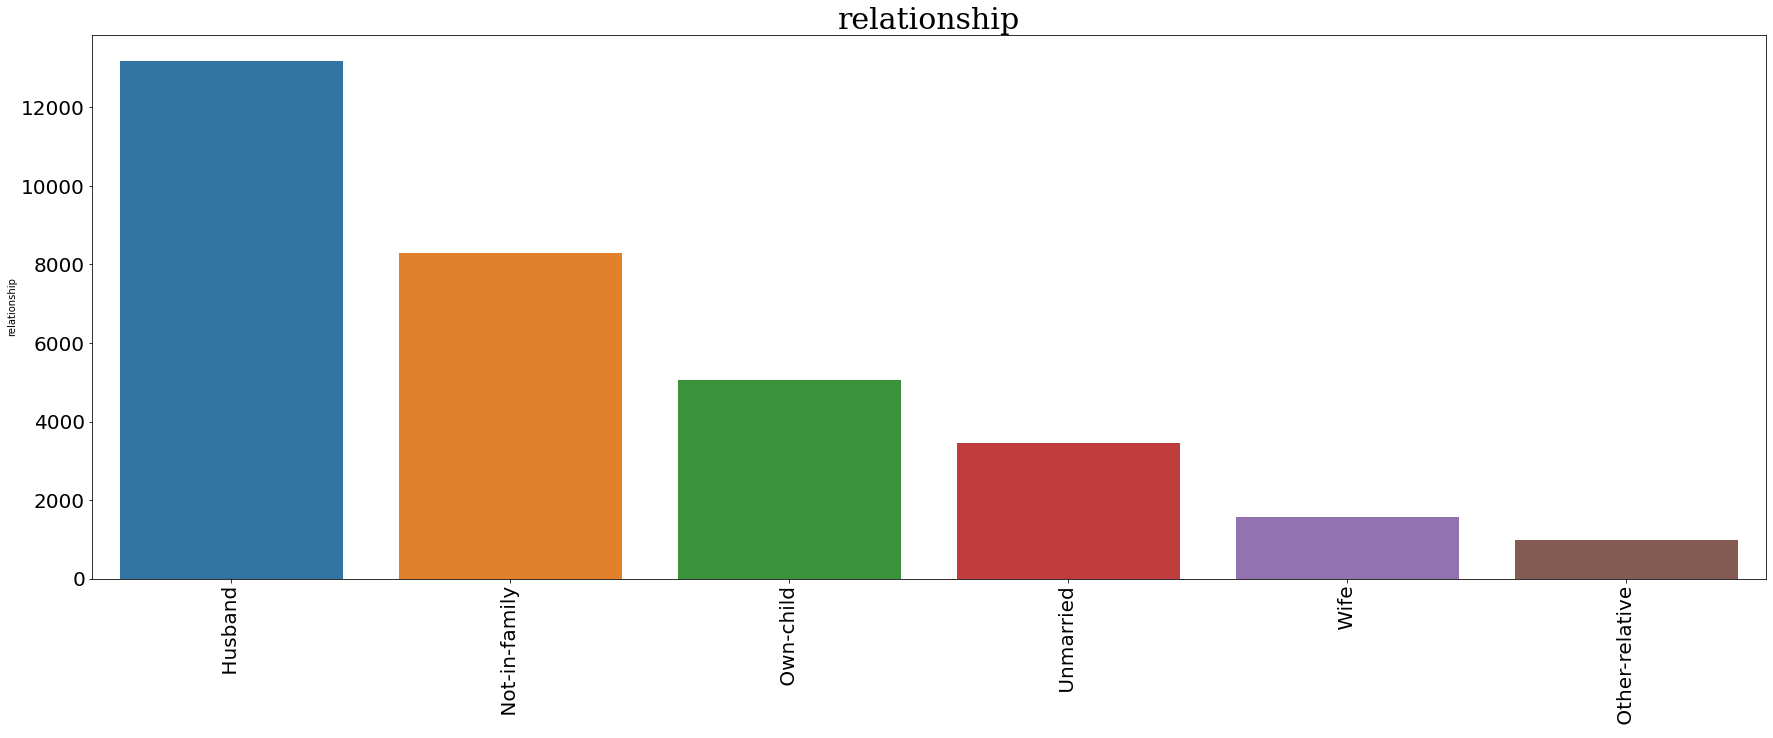

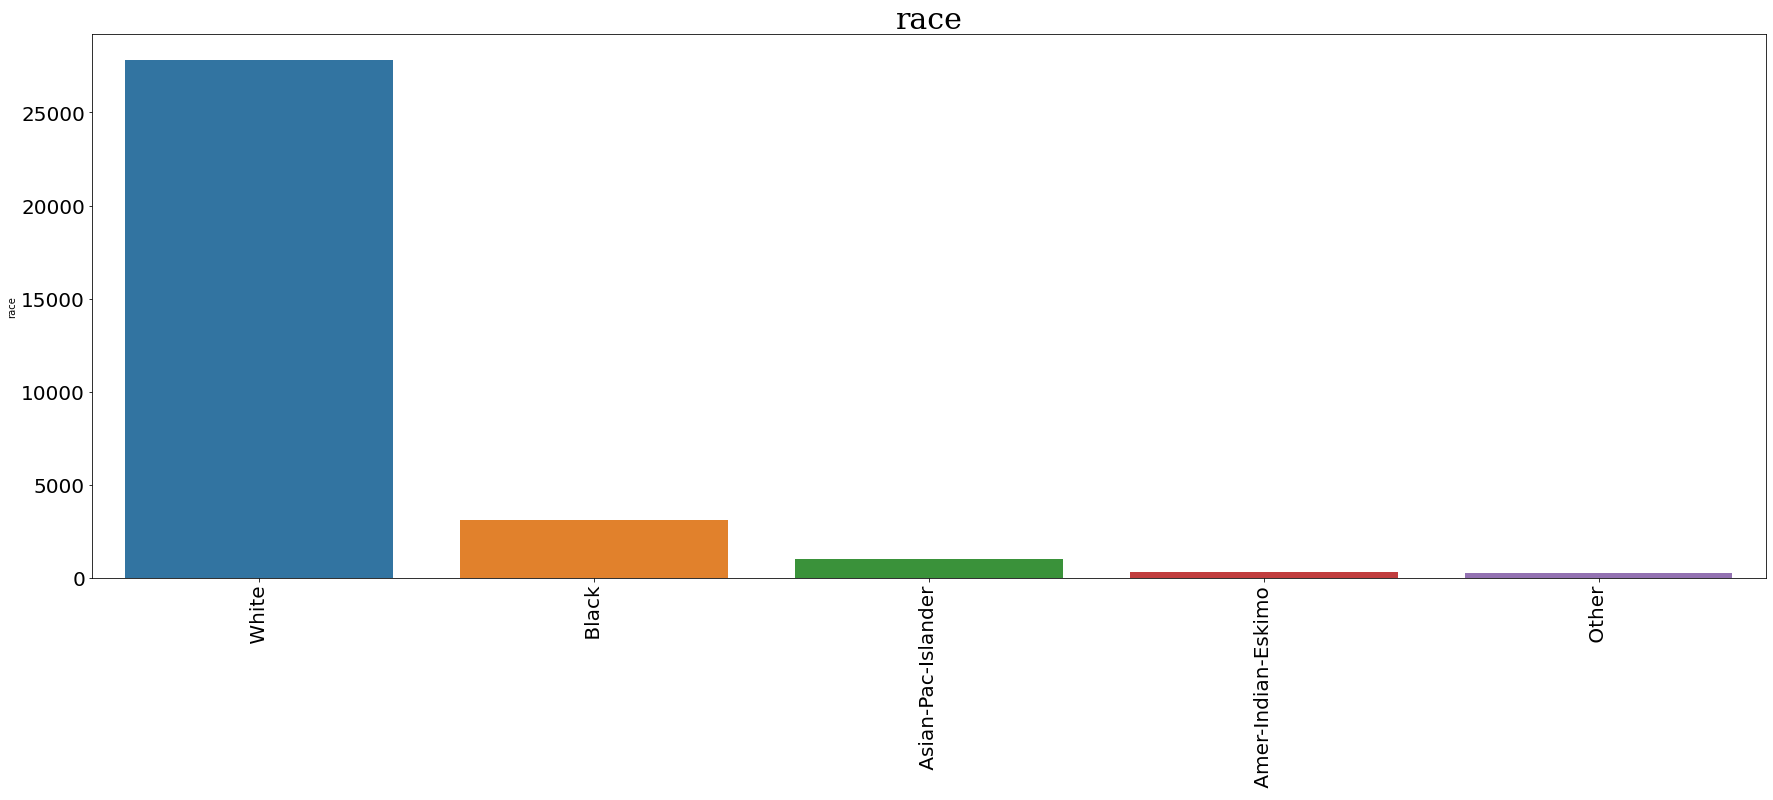

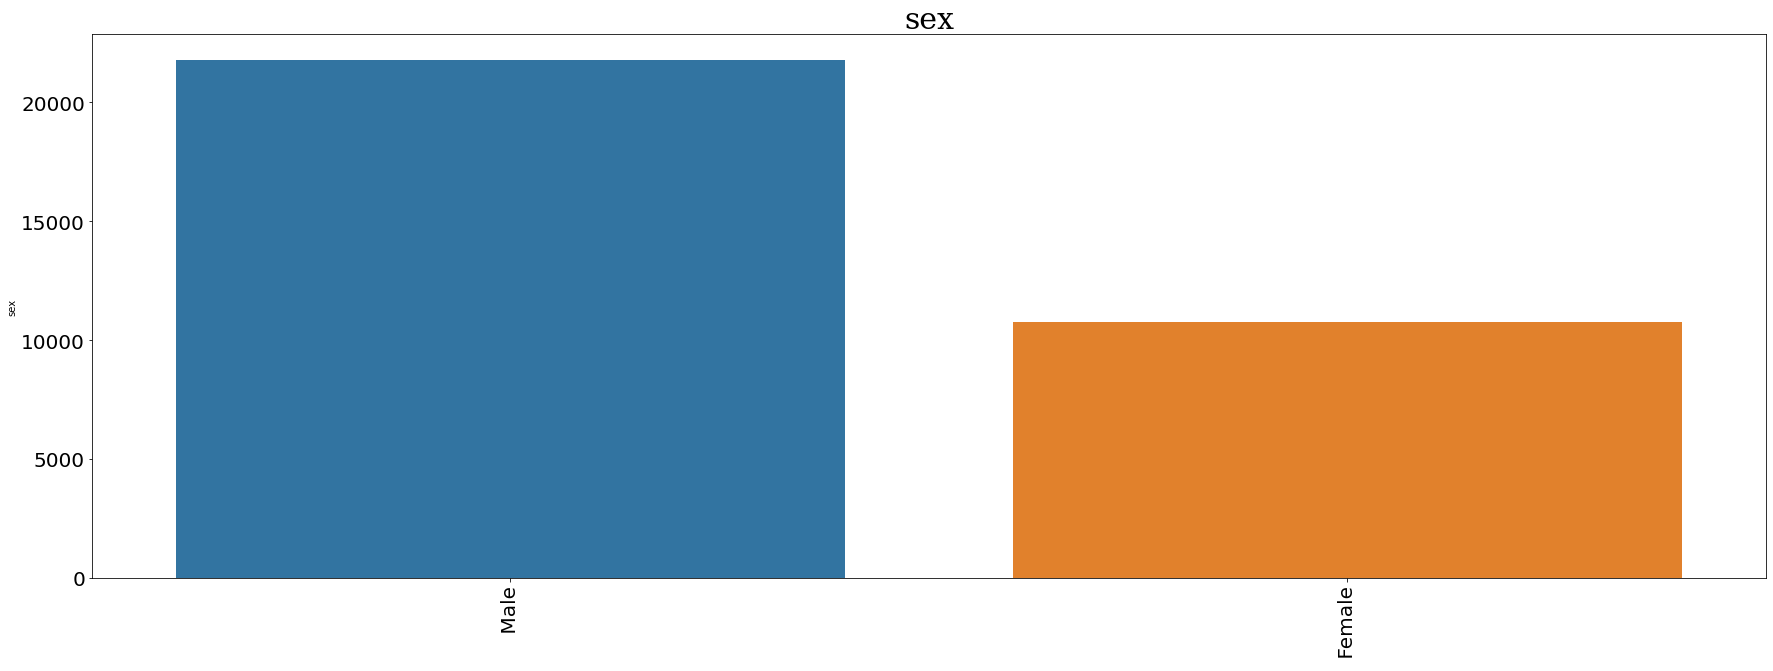

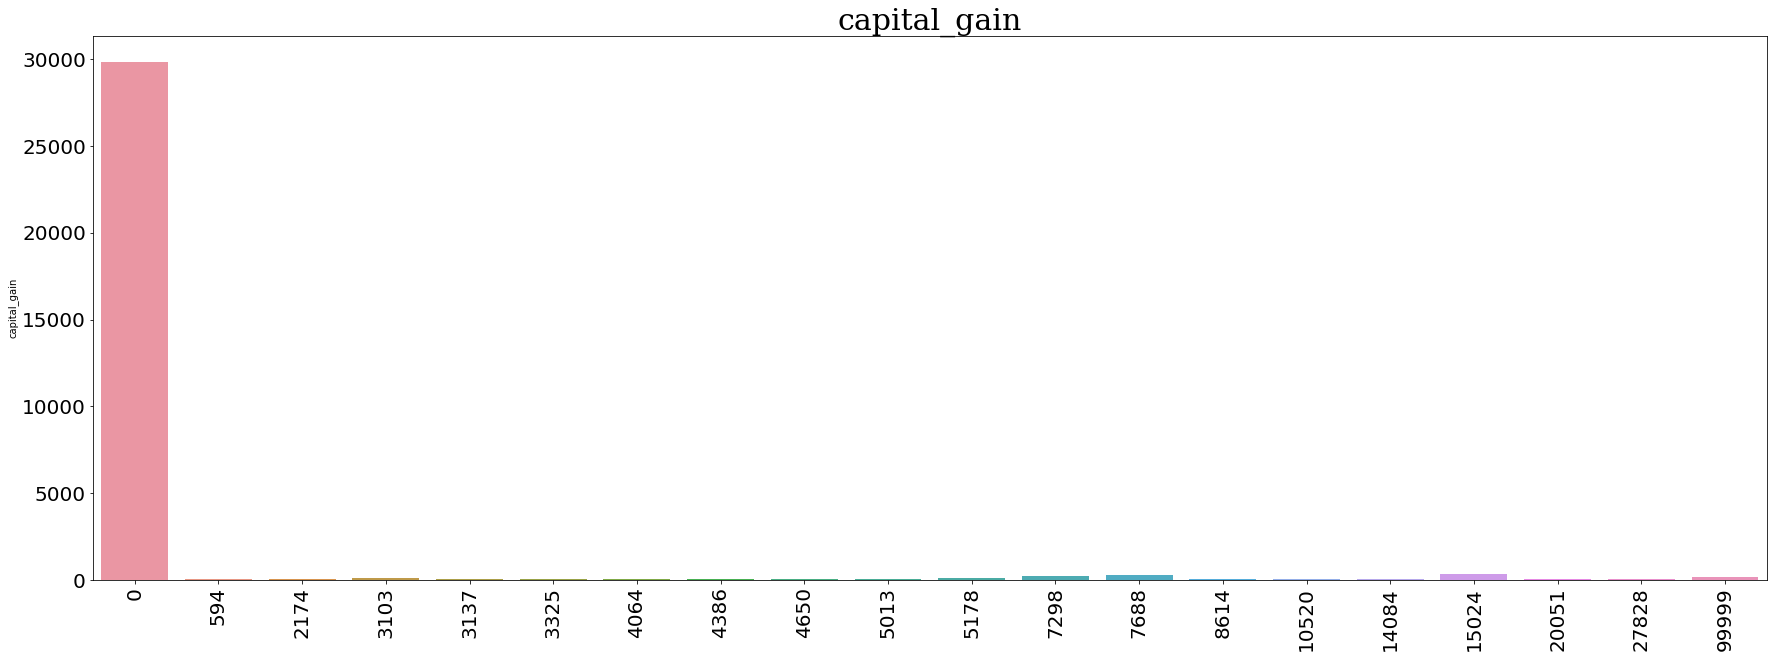

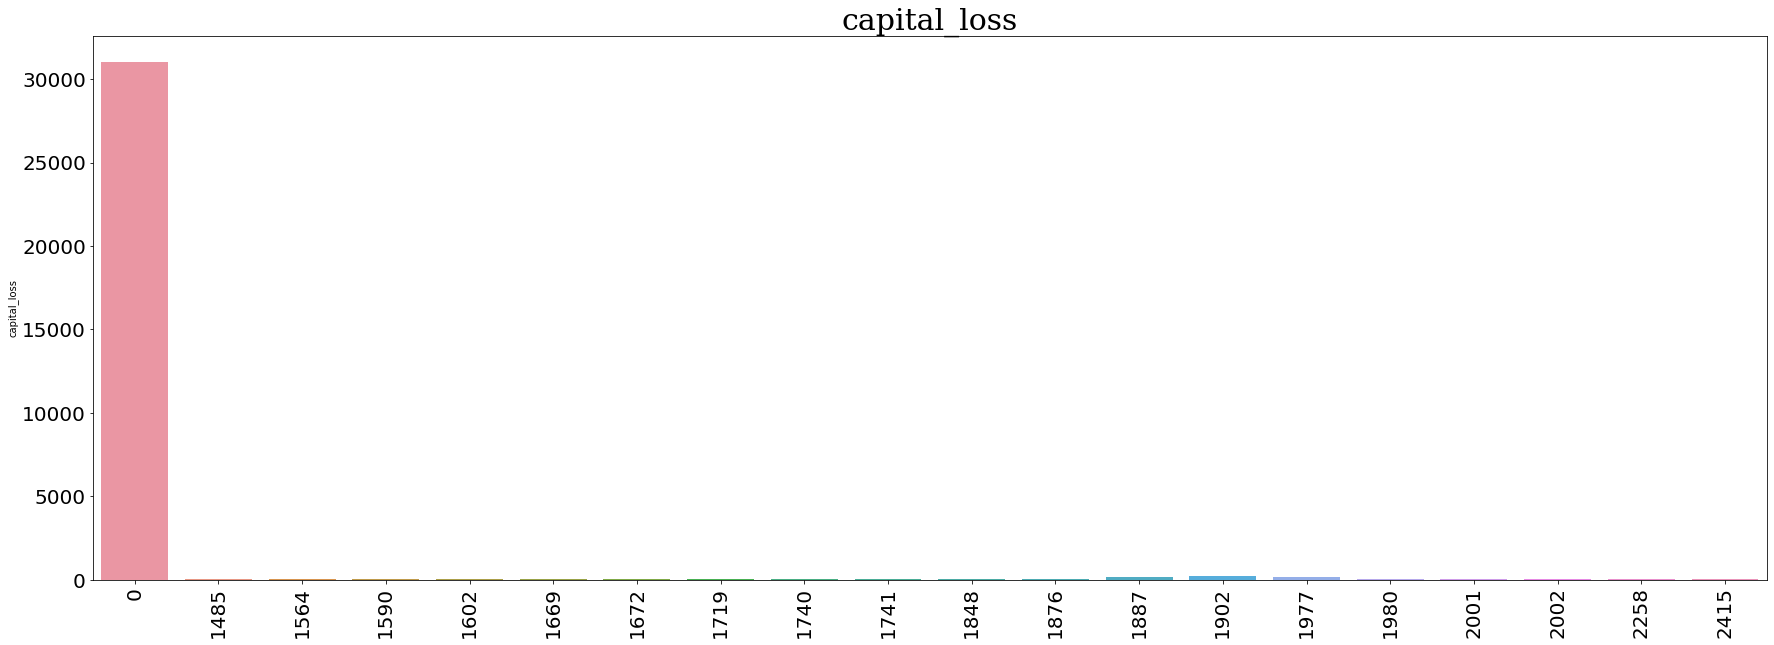

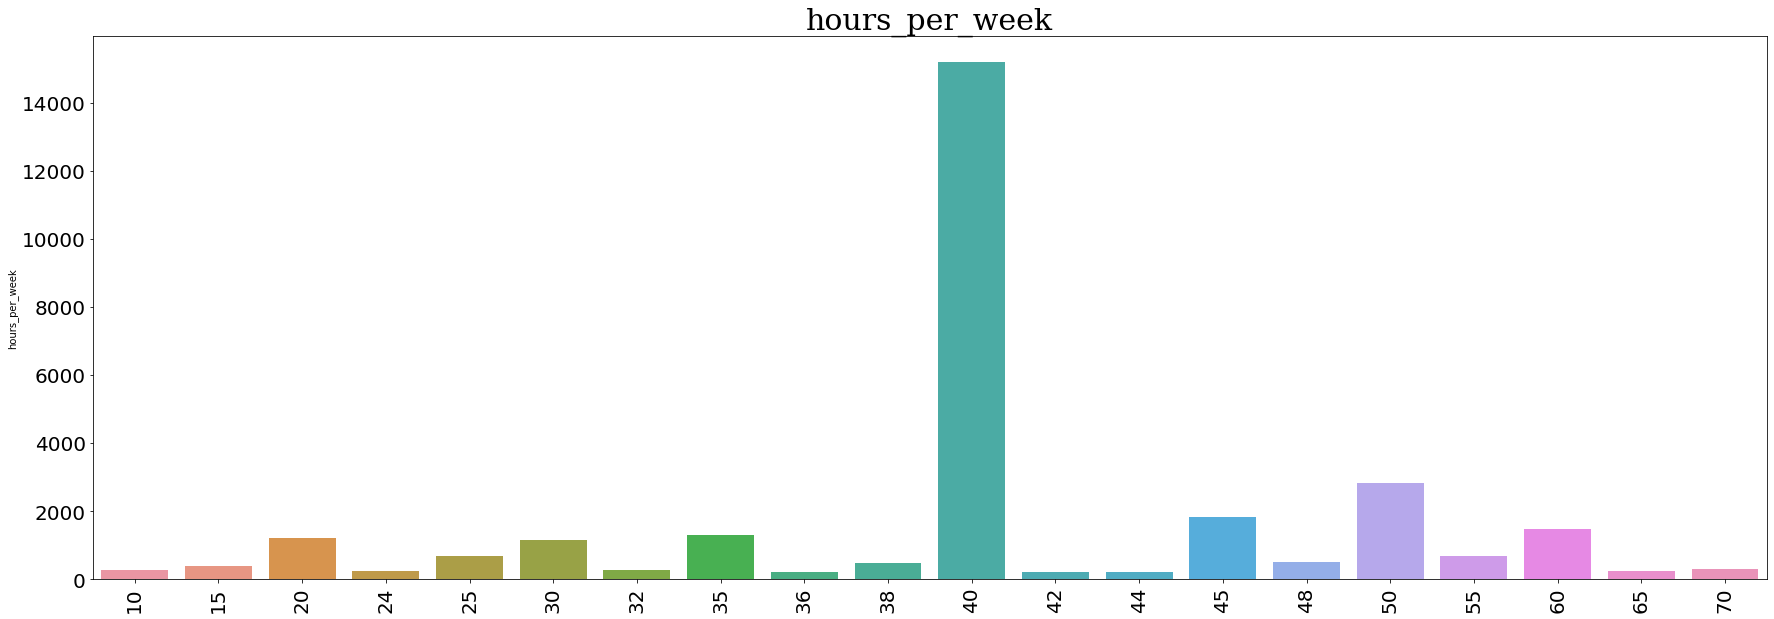

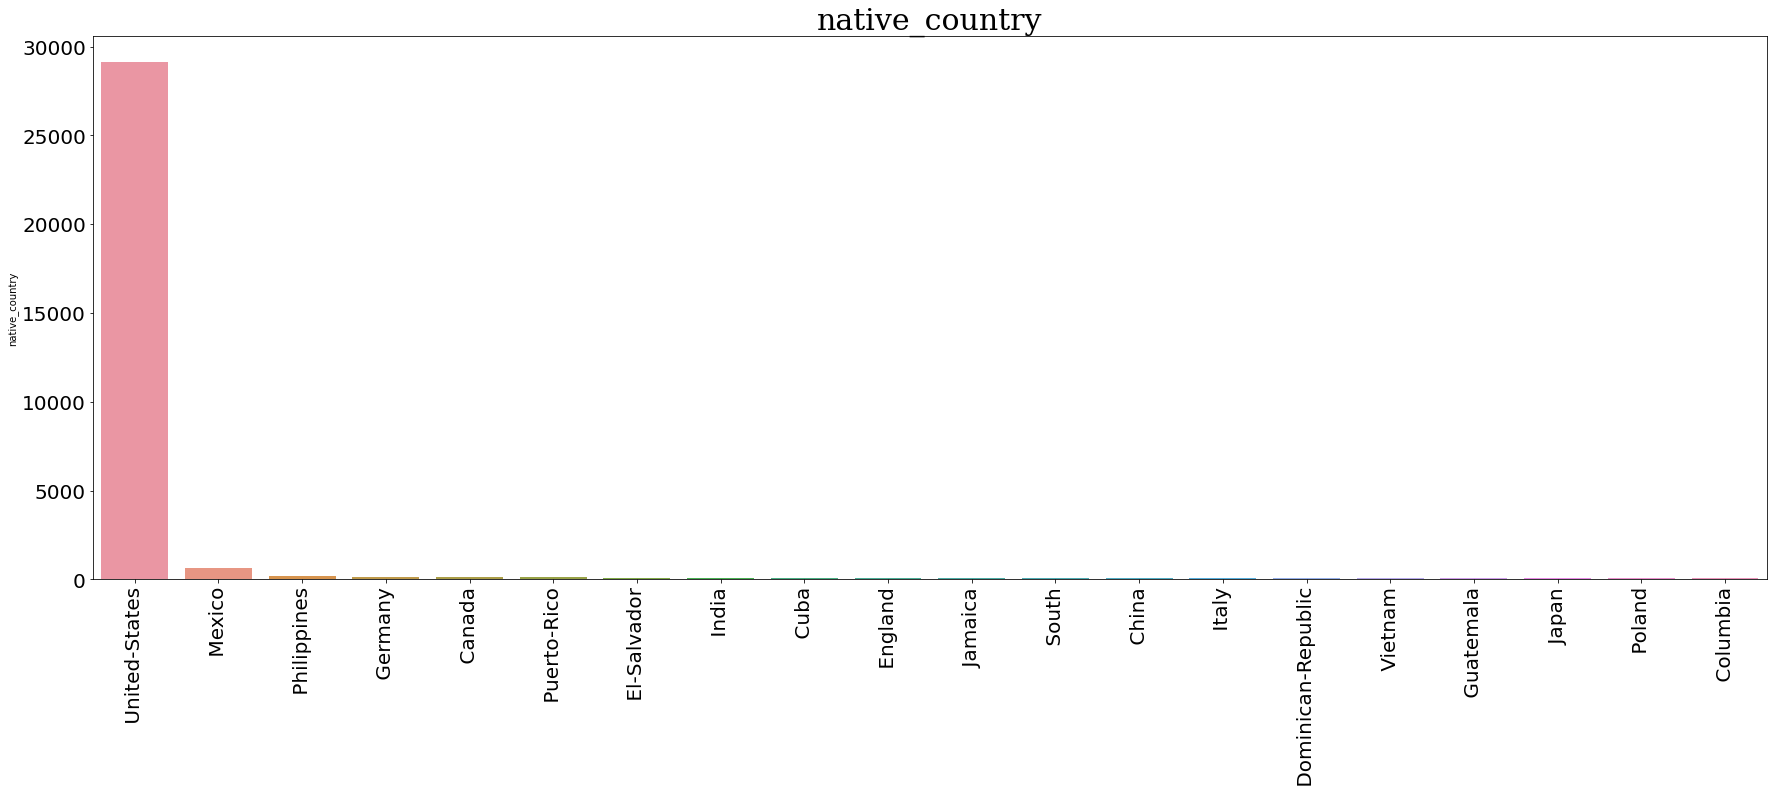

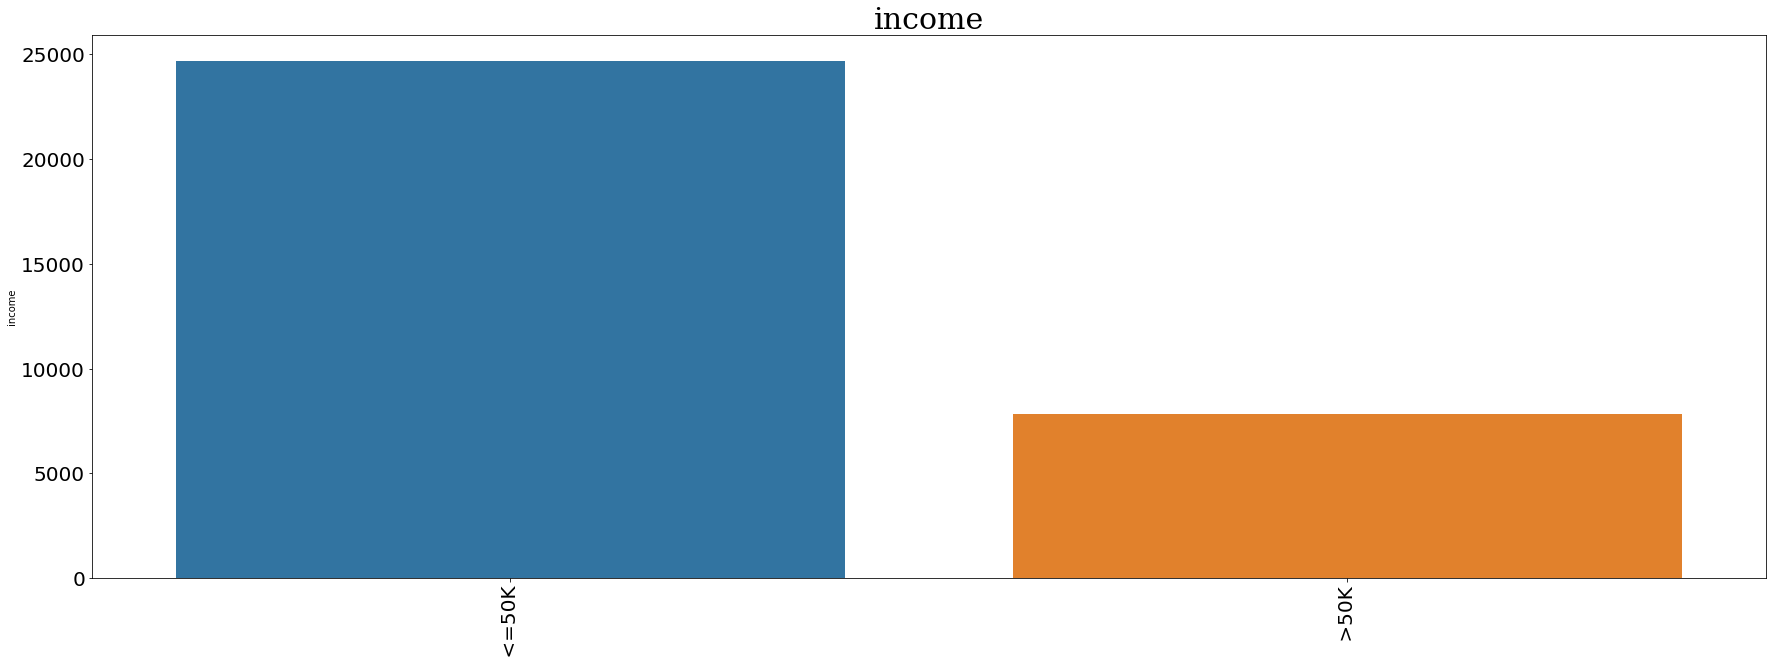

In [12]:
%%time
plot_each_columns(df)

#### Interpretations
1. Main occupation of People are Prof-specialty, Craft repair, exec-managerial, Adm-clerical, Sales <br>
2. Mostly people's Native country is from United States<br>
3. People having income less than 50K is more
4. AVg Working hours per week is 40
5. Capital Loss having 31018 number of rows zero which is large in number so other values are treated as outliers
6. Capital Gain having 29825 number of rows zero which is large in number so other values are treated as outliers
7. In the dataframe percentage of Male's are approximately double of Female's
8. Half of the male's are married
9. Mostly Race of the people is White 
10. Approxmately 10K people are not married
11. Mostly people are high school graduate or in some college or completed bachelors
12. Workclass of majority of people's is Private.

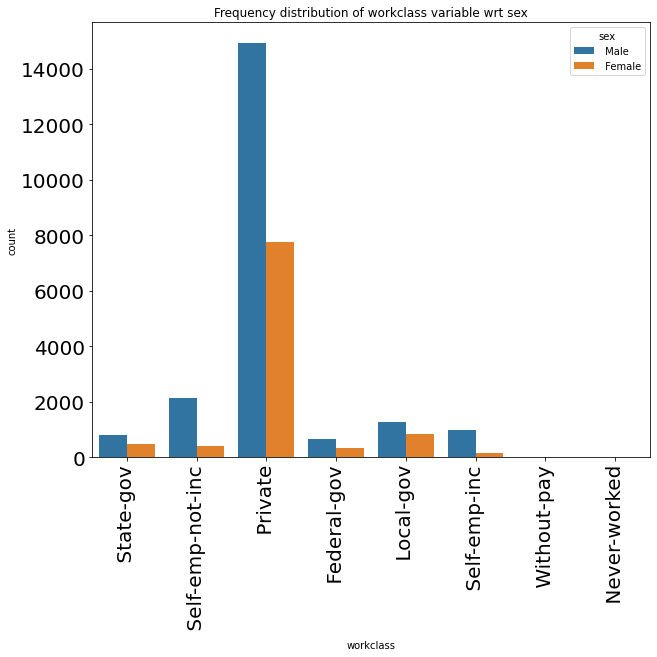

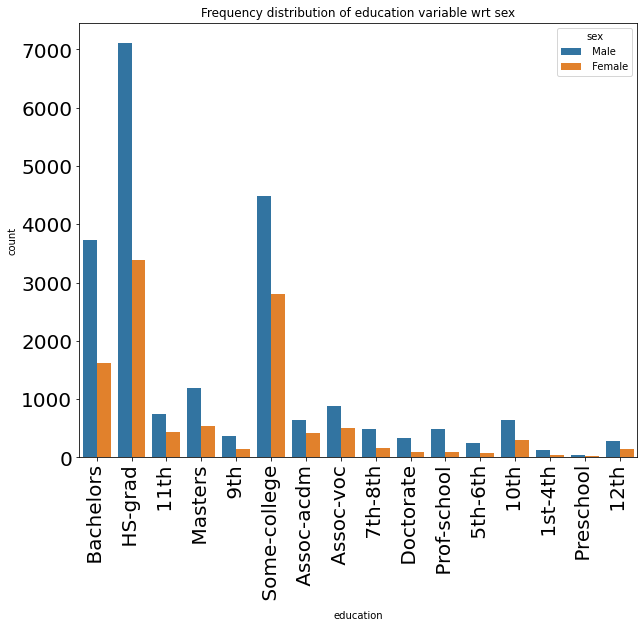

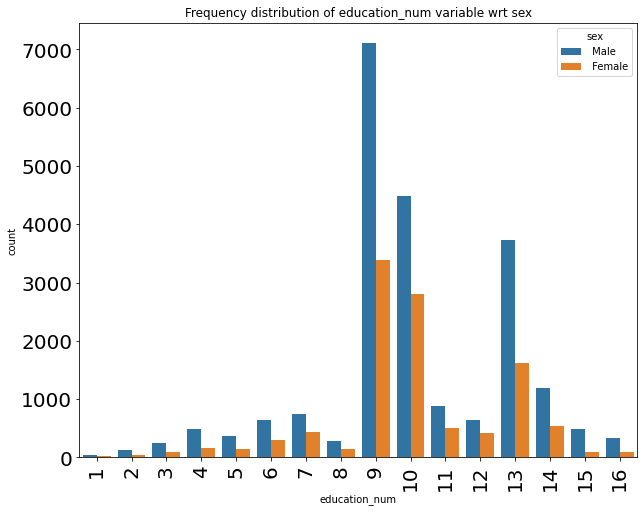

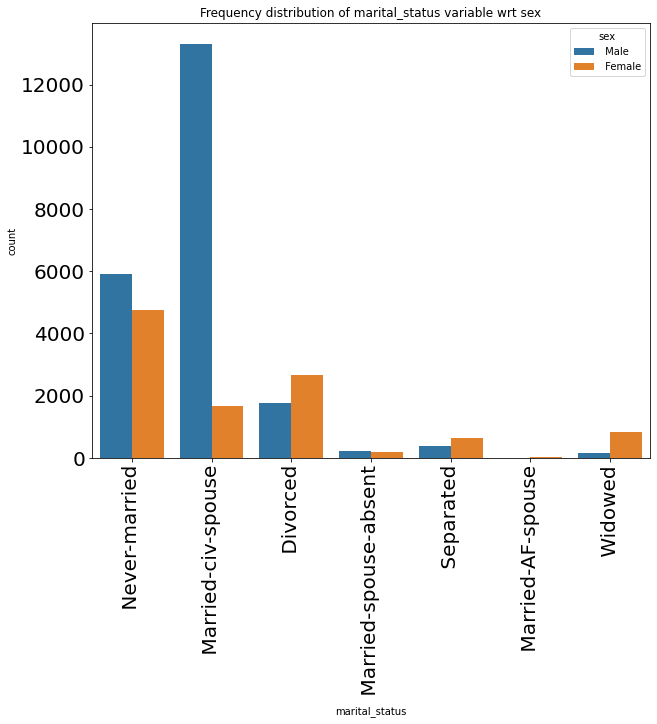

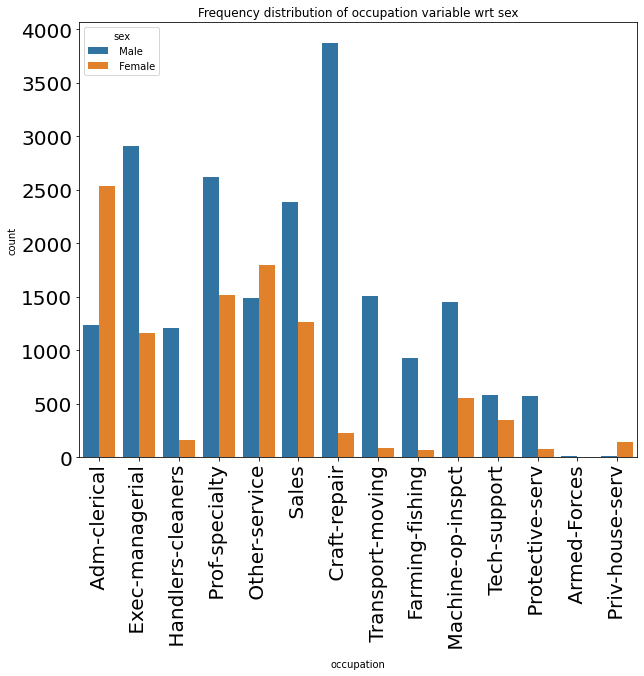

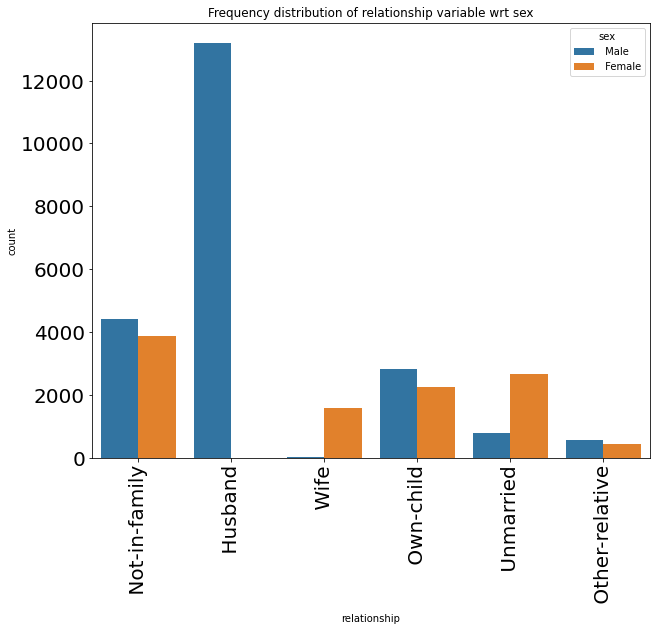

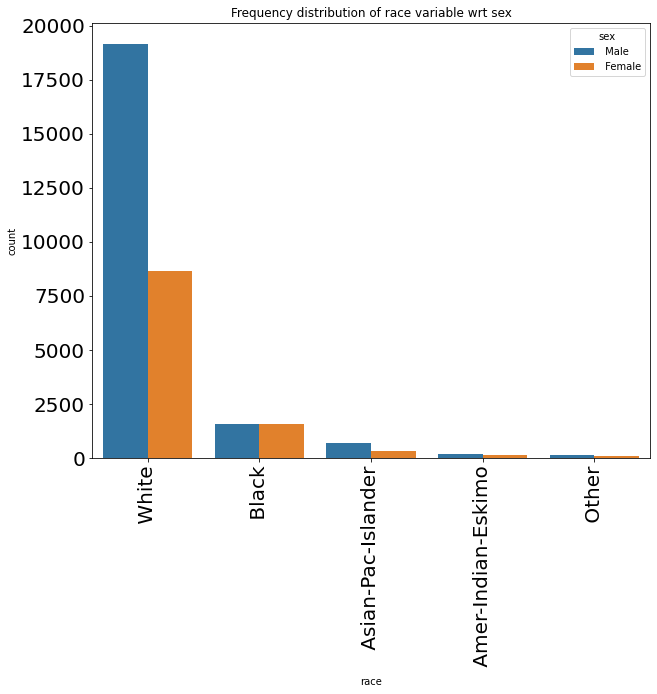

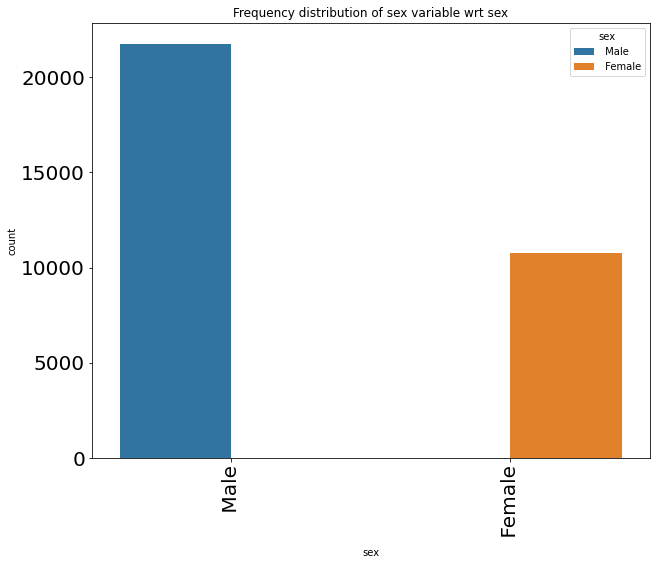

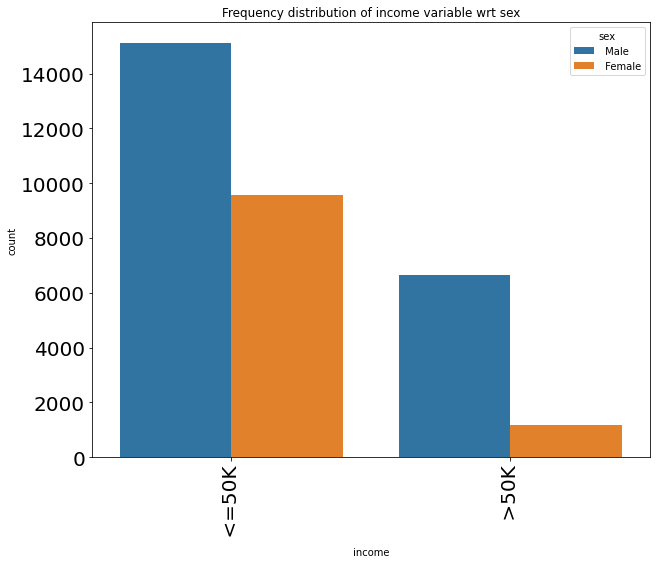

Wall time: 1.82 s


In [13]:
%%time
plot_columns(df,'sex')

#### Interpretations
1. Number of female having divorce, separated or widowed is more acc to marital status
2. Number of females working as ADM-clerical, priv-house serv,Other services are more
3. Most females are not in family, unmaried or wifes realtionship wise4
4. Ratio of male and female earning less than 50k is less then Ratio of male and female earning more than 50k

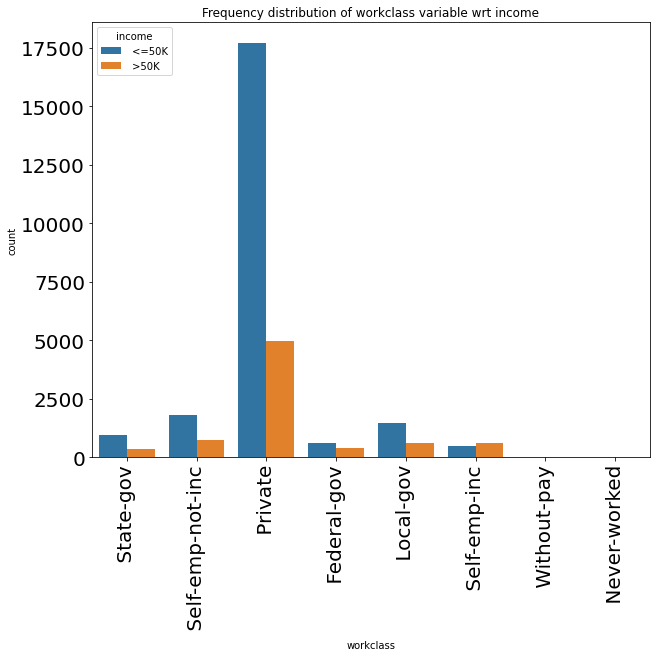

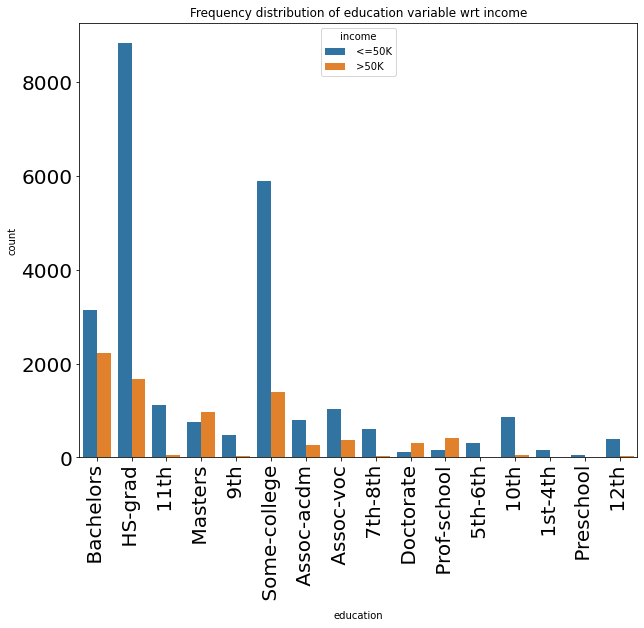

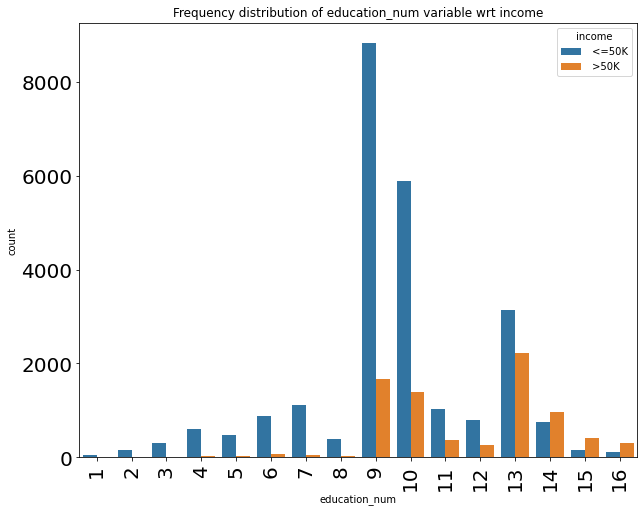

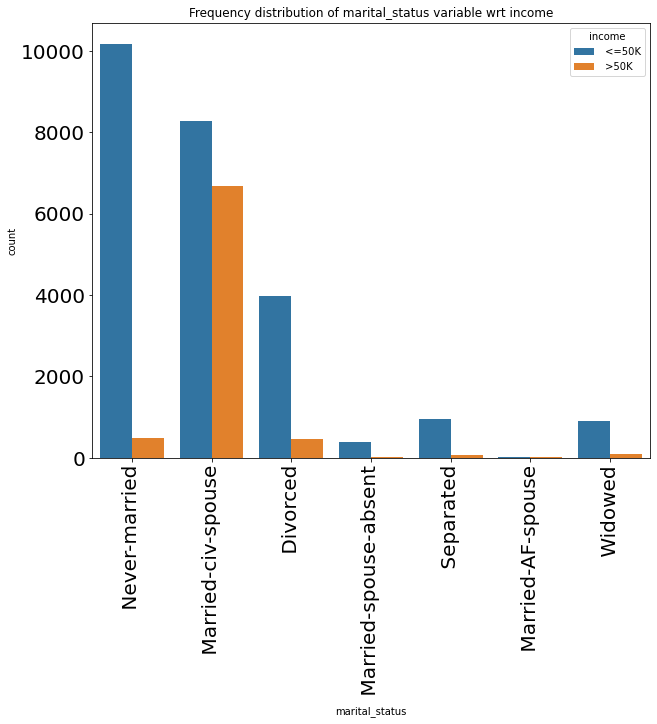

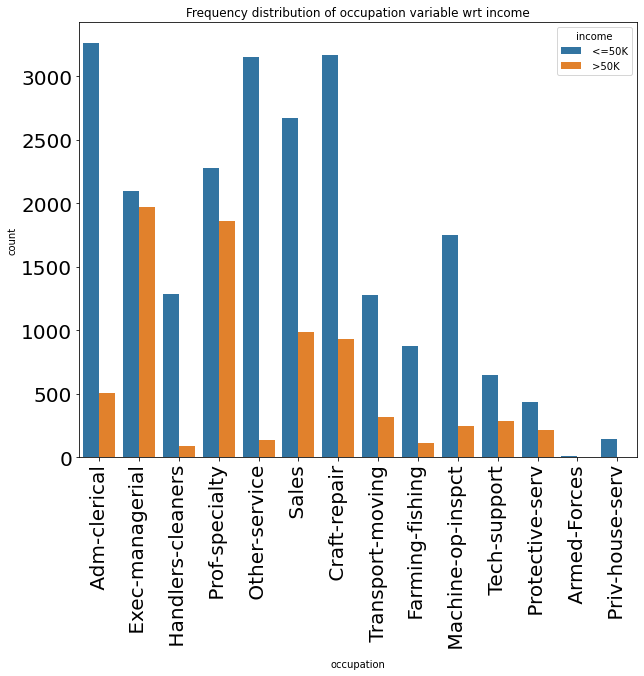

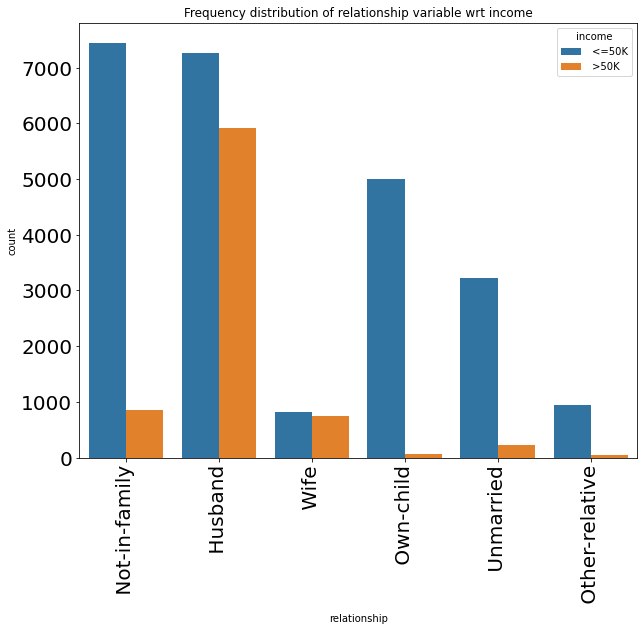

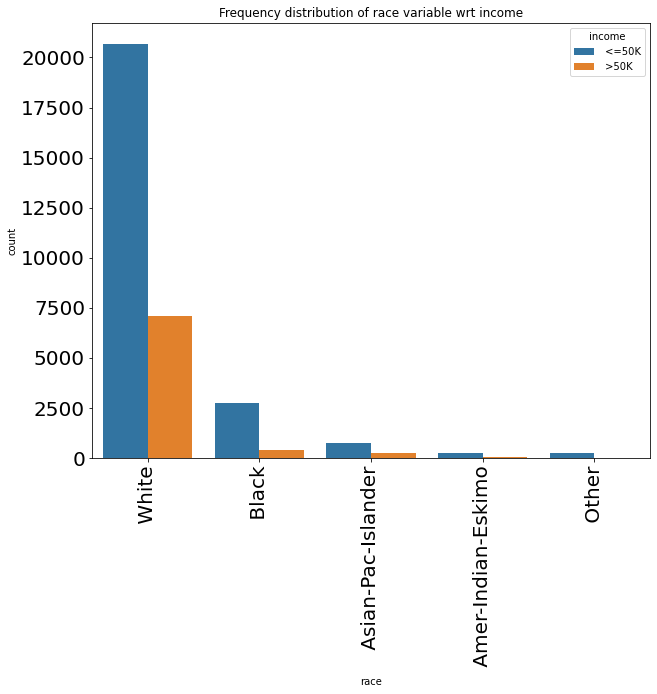

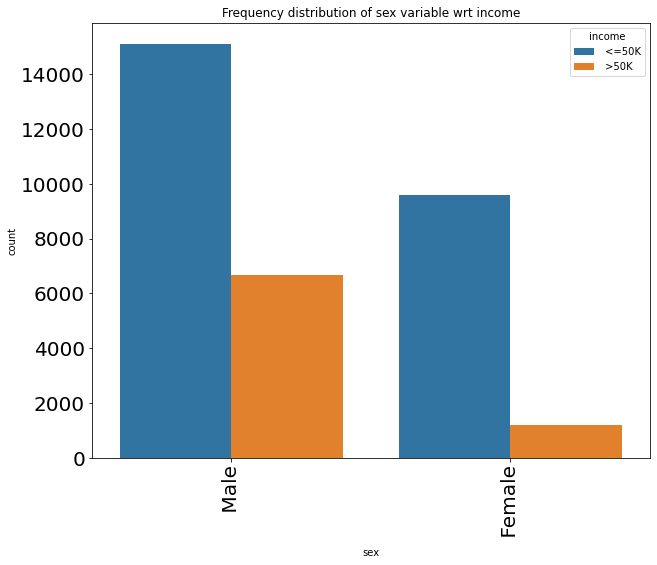

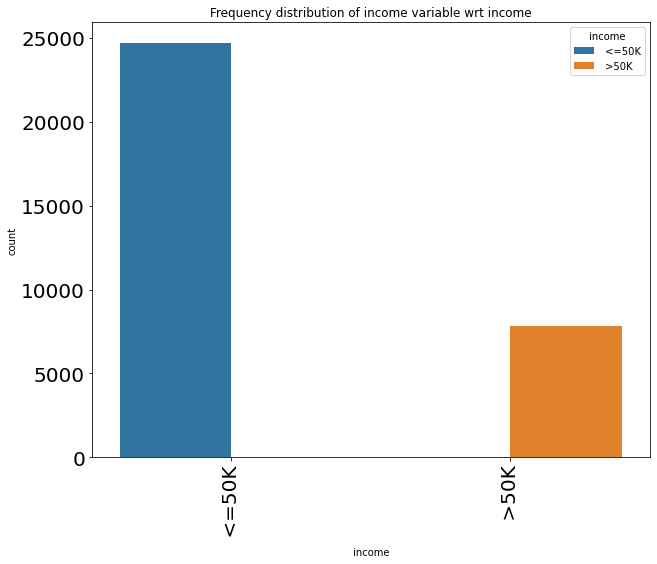

Wall time: 1.78 s


In [14]:
%%time
plot_columns(df,'income')

#### Interpretations:
1. People having Masters, Doctorate, Prof-school are having income more than 50k than less than 50k
2. People earning more than 50k income are having Married civ spouse Martial status
3. Income in Armed forces and priv-house serv is lowest


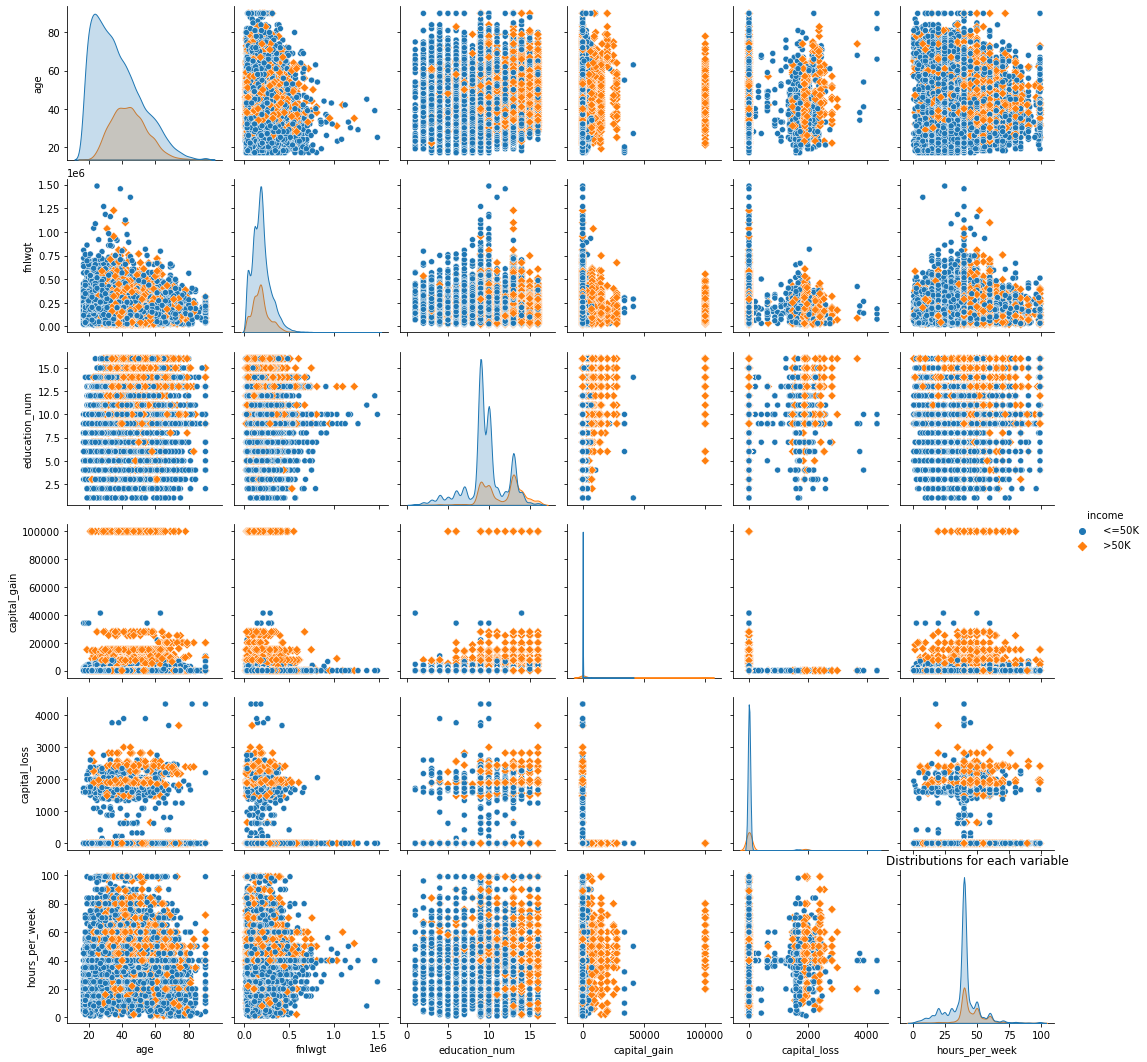

Wall time: 53.7 s


In [15]:
%%time
sns.pairplot(data=df, hue="income",markers=["o", "D"])
plt.title('Distributions for each variable')
plt.show()

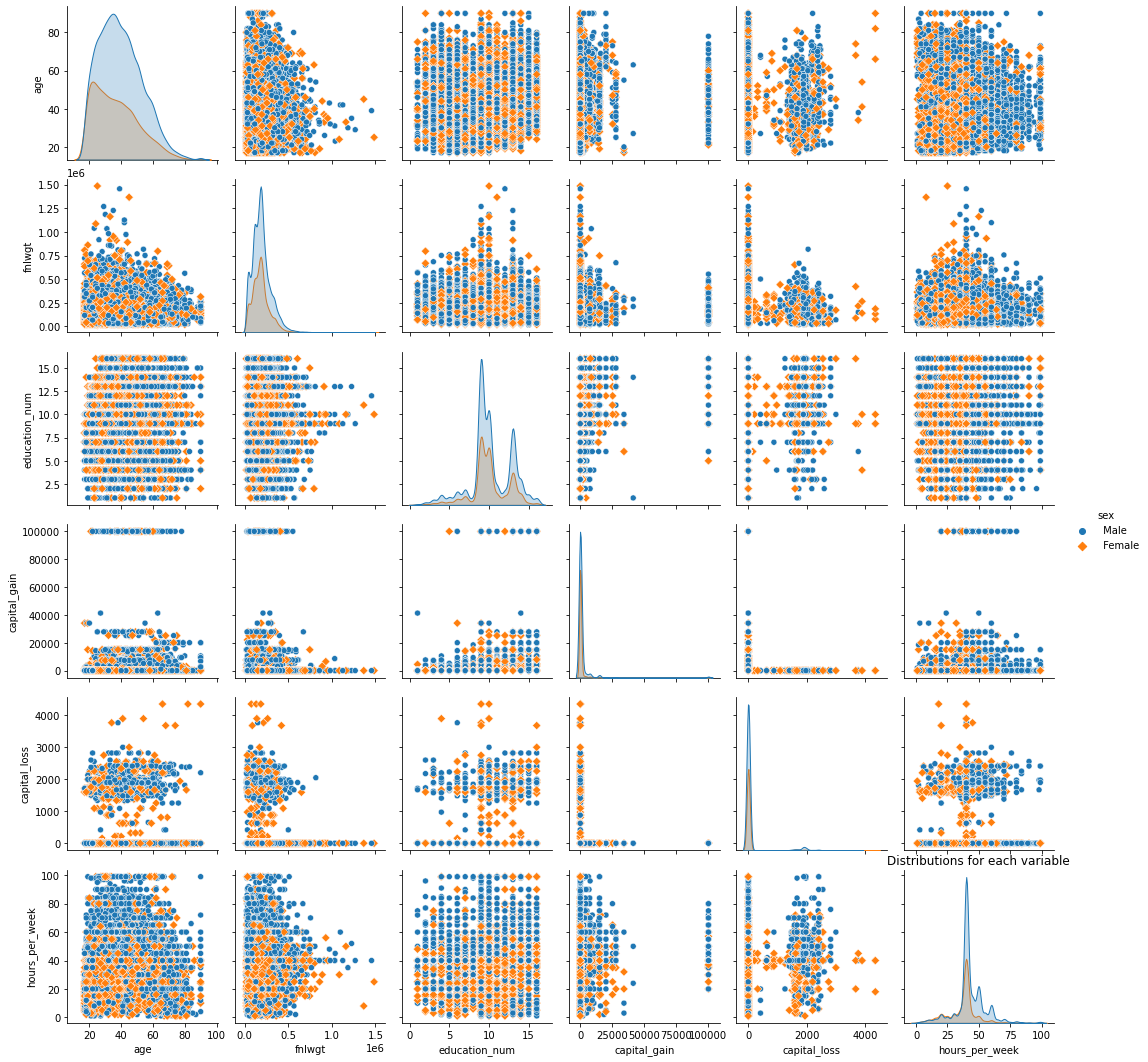

Wall time: 49.3 s


In [16]:
%%time
sns.pairplot(data=df, hue="sex",markers=["o", "D"])
plt.title('Distributions for each variable')
plt.show()

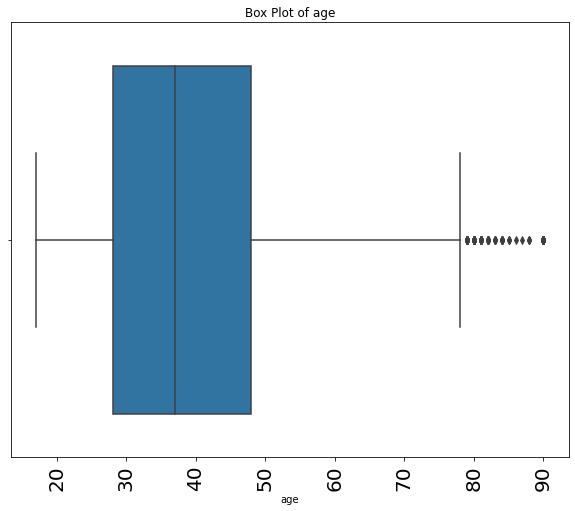

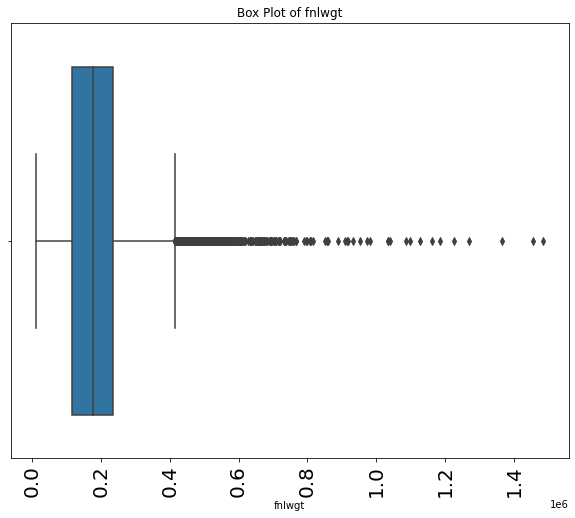

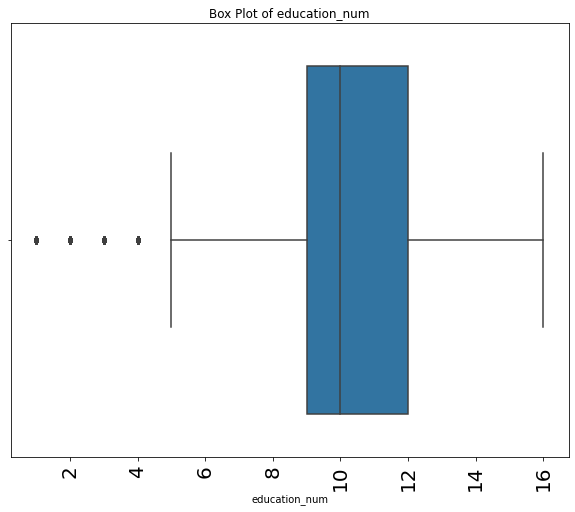

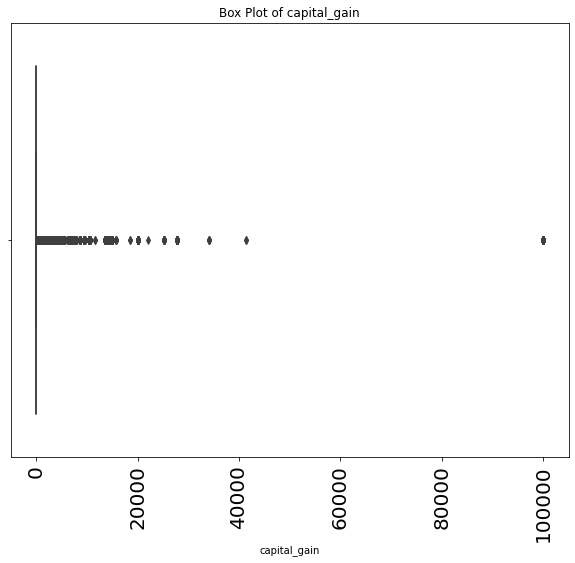

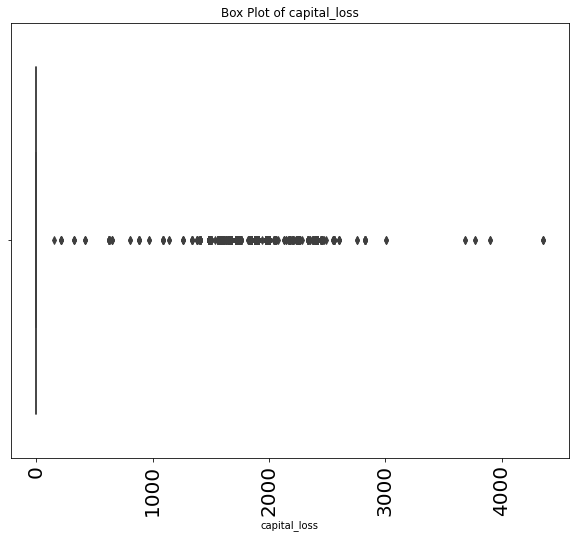

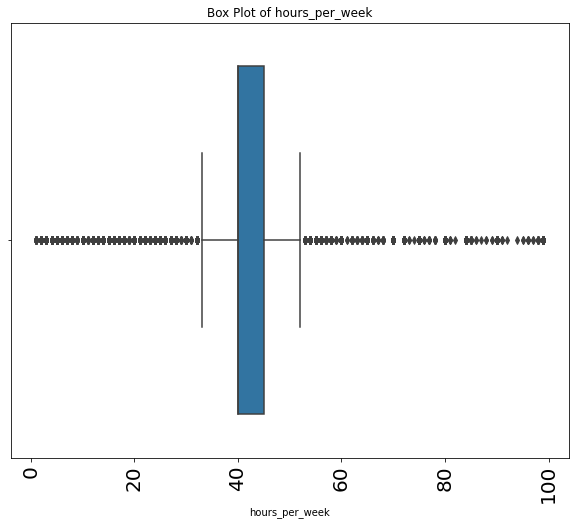

Wall time: 611 ms


In [17]:
%%time
boxplot_variable(df)

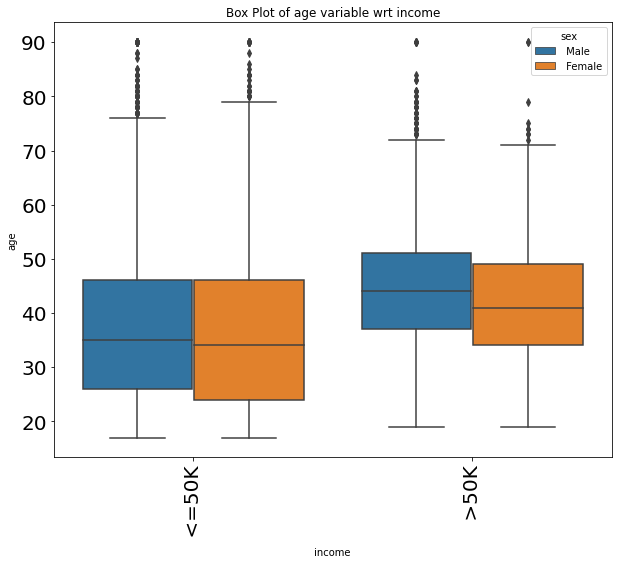

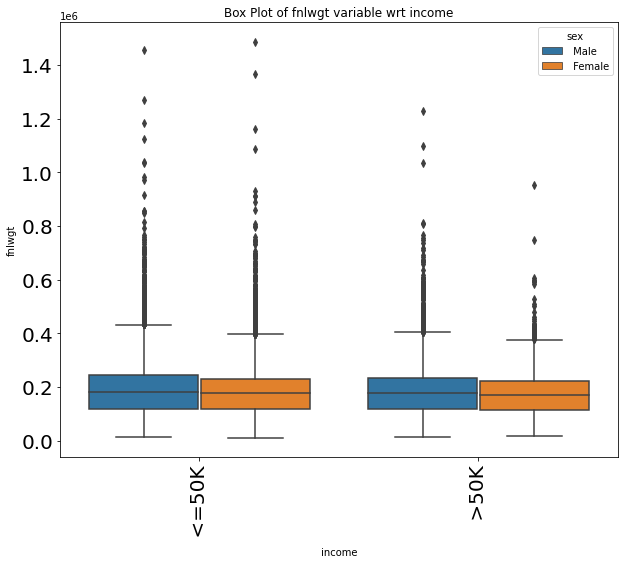

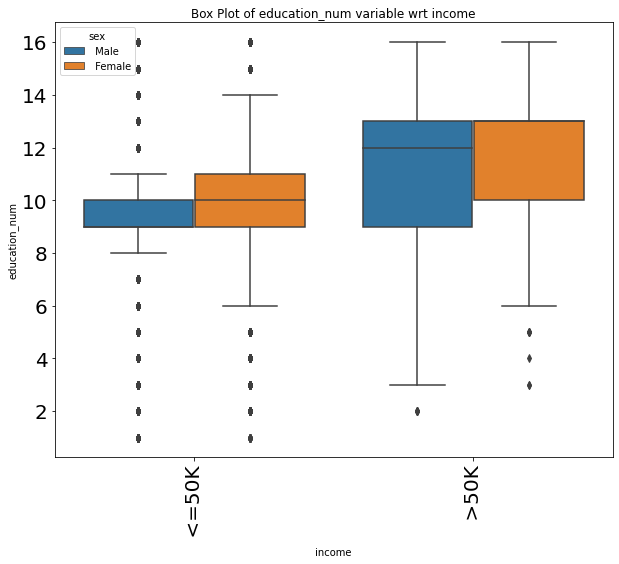

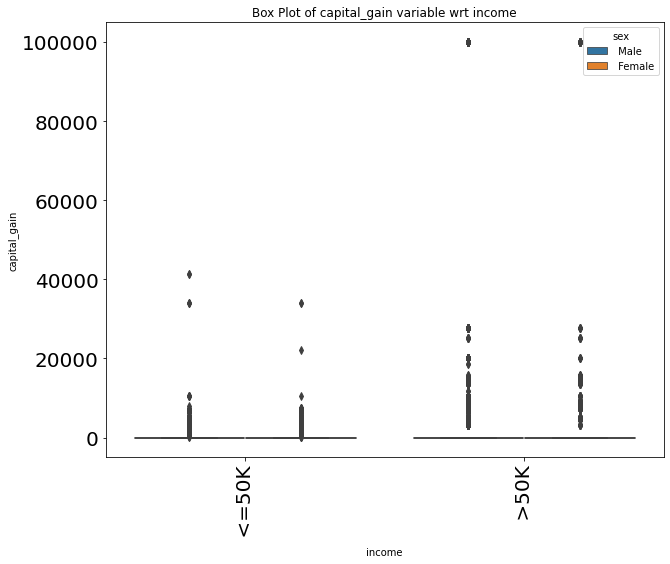

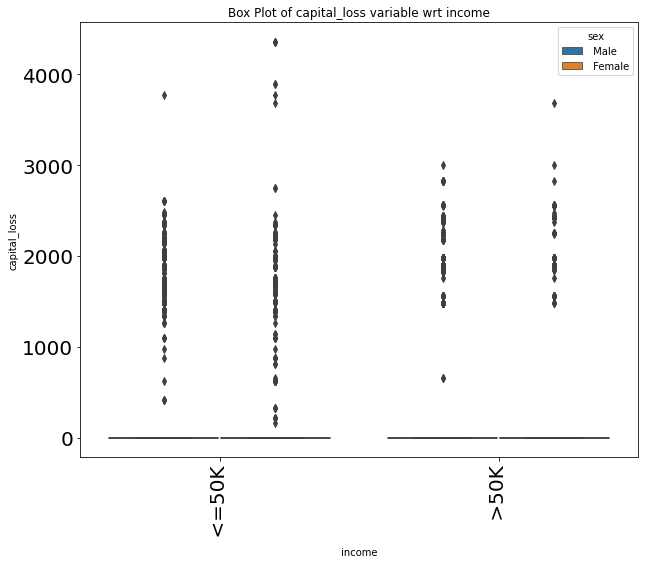

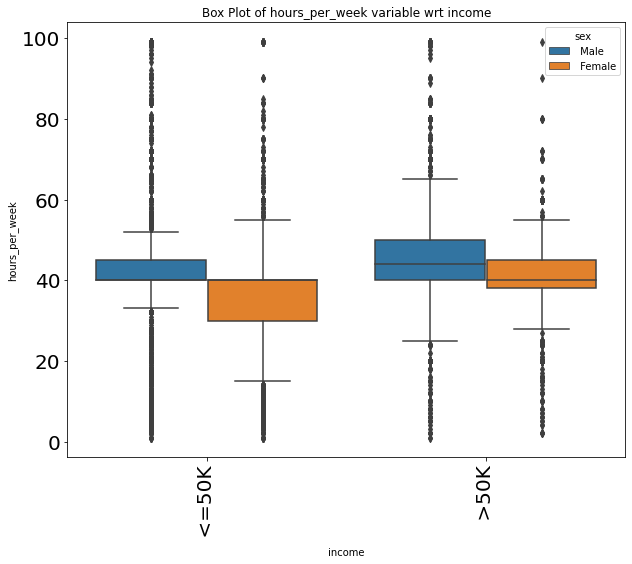

Wall time: 989 ms


In [18]:
%%time
boxplot_mult(df,x='income',hue_name='sex')    

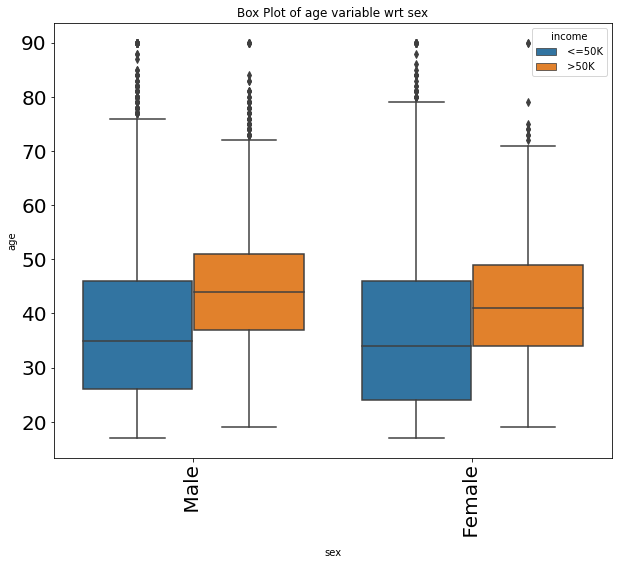

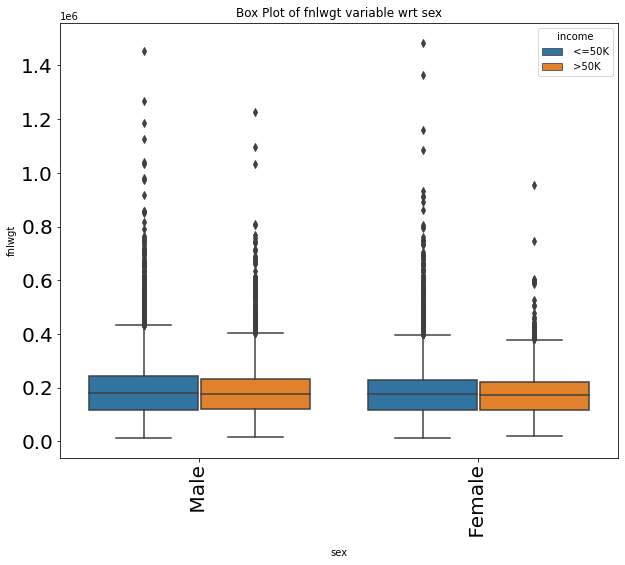

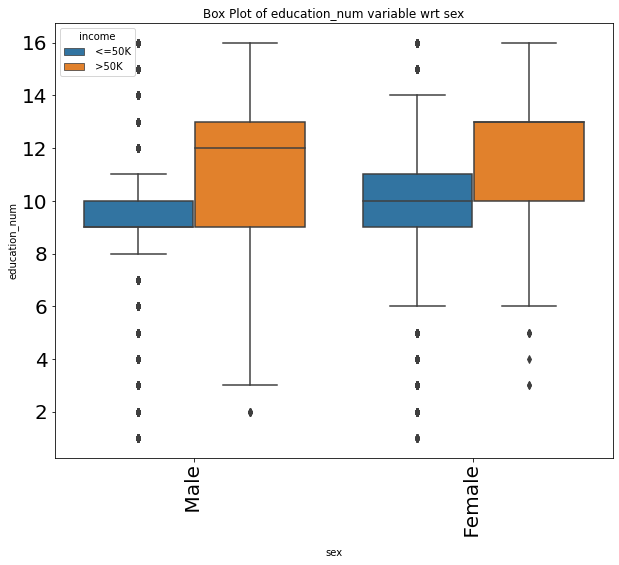

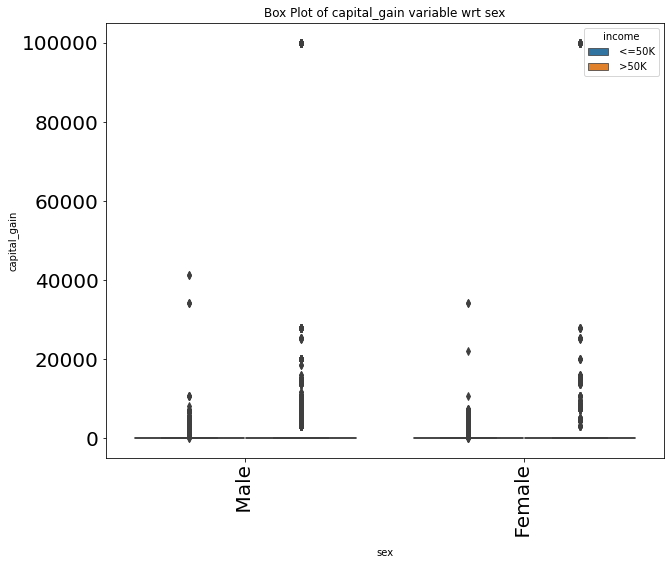

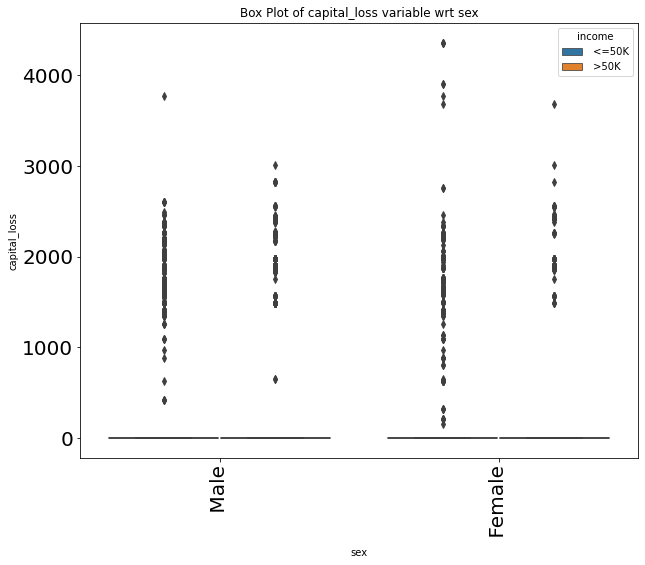

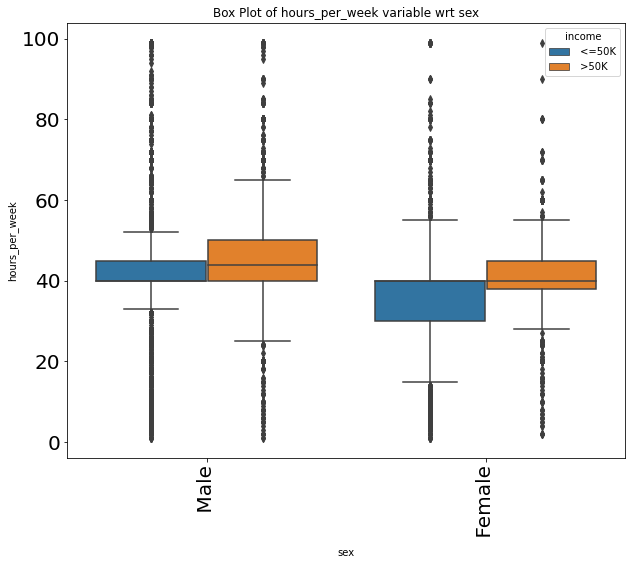

Wall time: 1.05 s


In [19]:
%%time
boxplot_mult(df,x='sex',hue_name='income')

#### Interpretations:
1. Capital loss and capital gain are having maximum outlier values because mostly rows in these columns are zero
2. Median of income more than 50k is more in males than females
3. Education num for mor than 50k is more in females
4. Income of older people is more than younger ones

In [20]:
%%time
df.corr()

Wall time: 4.99 ms


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education_num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital_gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital_loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours_per_week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


###  Filling missing values using ffill

In [21]:
%%time
df["workclass"].fillna('ffill',inplace=True)
df["occupation"].fillna('ffill',inplace=True)
df["native_country"].fillna('ffill',inplace=True)

Wall time: 3.99 ms


### Changing the categorical columns into numerical

In [22]:
%%time
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Wall time: 0 ns


In [23]:
for i in df[categorical]:
    df[i] = le.fit_transform(df[i])

In [24]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32533,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32534,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32535,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [25]:
X = df.drop('income',axis=1)
y = df["income"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [27]:
X_train.shape, X_test.shape

((22775, 14), (9762, 14))

In [28]:
# function for generating the performance report of the trained model 
def report(model,X_train, X_test, y_train, y_test):
    print(start+'For training Data'+end)
    y_pred = model.predict(X_train)
    print(classification_report(y_train,y_pred))
    print(f'F1 Score for train data is {f1_score(y_train,y_pred)}')
    print(f'Precision for train data is {precision_score(y_train,y_pred)}')
    print(f'Recall for train data is {recall_score(y_train,y_pred)}')
    print('\n',start+'For testing Data'+end)
    y_pred = lr.predict(X_test)
    print(classification_report(y_test,y_pred))
    print(f'F1 Score for test data is {f1_score(y_test,y_pred)}')
    print(f'Precision for train data is {precision_score(y_test,y_pred)}')
    print(f'Recall for train data is {recall_score(y_test,y_pred)}')


## Training model simply

### Logistic Regression

In [29]:
%%time
# Logistic Regression
lr = LogisticRegression(solver='liblinear',random_state=123)
lr.fit(X_train,y_train)
report(lr,X_train, X_test, y_train, y_test)

For training Data
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     17318
           1       0.66      0.29      0.40      5457

    accuracy                           0.79     22775
   macro avg       0.74      0.62      0.64     22775
weighted avg       0.77      0.79      0.76     22775

F1 Score for train data is 0.4031146285422517
Precision for train data is 0.6642827092974337
Recall for train data is 0.289353124427341

 For testing Data
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7380
           1       0.69      0.29      0.41      2382

    accuracy                           0.79      9762
   macro avg       0.75      0.62      0.64      9762
weighted avg       0.78      0.79      0.76      9762

F1 Score for test data is 0.4094395280235988
Precision for train data is 0.6884920634920635
Recall for train data is 0.29135180520570947
Wall time: 172 ms


### Decision Tree

In [30]:
%%time
# decision tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
report(dt,X_train, X_test, y_train, y_test)

For training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17318
           1       1.00      1.00      1.00      5457

    accuracy                           1.00     22775
   macro avg       1.00      1.00      1.00     22775
weighted avg       1.00      1.00      1.00     22775

F1 Score for train data is 0.9999083661687894
Precision for train data is 1.0
Recall for train data is 0.9998167491295583

 For testing Data
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7380
           1       0.69      0.29      0.41      2382

    accuracy                           0.79      9762
   macro avg       0.75      0.62      0.64      9762
weighted avg       0.78      0.79      0.76      9762

F1 Score for test data is 0.4094395280235988
Precision for train data is 0.6884920634920635
Recall for train data is 0.29135180520570947
Wall time: 162 ms


### Random Forest 

In [31]:
%%time
# random forest
rf = RandomForestClassifier(n_estimators=100,random_state=123)
rf.fit(X_train,y_train)
report(rf,X_train, X_test, y_train, y_test)

For training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17318
           1       1.00      1.00      1.00      5457

    accuracy                           1.00     22775
   macro avg       1.00      1.00      1.00     22775
weighted avg       1.00      1.00      1.00     22775

F1 Score for train data is 0.9998167155425219
Precision for train data is 1.0
Recall for train data is 0.9996334982591167

 For testing Data
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7380
           1       0.69      0.29      0.41      2382

    accuracy                           0.79      9762
   macro avg       0.75      0.62      0.64      9762
weighted avg       0.78      0.79      0.76      9762

F1 Score for test data is 0.4094395280235988
Precision for train data is 0.6884920634920635
Recall for train data is 0.29135180520570947
Wall time: 2.19 s


### XGBoost

In [32]:
%%time
# Xgboost Classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)
report(xgb,X_train, X_test, y_train, y_test)

For training Data
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     17318
           1       0.87      0.76      0.81      5457

    accuracy                           0.91     22775
   macro avg       0.90      0.86      0.88     22775
weighted avg       0.91      0.91      0.91     22775

F1 Score for train data is 0.8106786622335226
Precision for train data is 0.8691549591109248
Recall for train data is 0.7595748579805754

 For testing Data
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7380
           1       0.69      0.29      0.41      2382

    accuracy                           0.79      9762
   macro avg       0.75      0.62      0.64      9762
weighted avg       0.78      0.79      0.76      9762

F1 Score for test data is 0.4094395280235988
Precision for train data is 0.6884920634920635
Recall for train data is 0.29135180520570947
Wall time: 2.31 s


## Training model using Hyparparmeter  tuning

### Logistics Regression

In [33]:
%%time
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lr1=LogisticRegression(random_state=123)
lr_cv=GridSearchCV(lr1,grid,cv=10)
lr_cv.fit(X_train,y_train)


Wall time: 11.5 s


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=123),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [34]:
lr_cv.best_params_

{'C': 1000.0, 'penalty': 'l2'}

In [35]:
%%time
# Logistic Regression
lr = LogisticRegression(solver='liblinear',random_state=123,C= 1000.0, penalty= 'l2')
lr.fit(X_train,y_train)
report(lr,X_train, X_test, y_train, y_test)


For training Data
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     17318
           1       0.66      0.29      0.40      5457

    accuracy                           0.79     22775
   macro avg       0.74      0.62      0.64     22775
weighted avg       0.77      0.79      0.76     22775

F1 Score for train data is 0.4031146285422517
Precision for train data is 0.6642827092974337
Recall for train data is 0.289353124427341

 For testing Data
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7380
           1       0.69      0.29      0.41      2382

    accuracy                           0.79      9762
   macro avg       0.75      0.62      0.64      9762
weighted avg       0.78      0.79      0.76      9762

F1 Score for test data is 0.4094395280235988
Precision for train data is 0.6884920634920635
Recall for train data is 0.29135180520570947
Wall time: 197 ms


### Decision Tree

In [36]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt1 = tree.DecisionTreeClassifier()
dt_cv = GridSearchCV(dt1, tree_para, cv=5)
dt_cv.fit(X_train,y_train)
dt_cv.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [37]:
%%time
# decision tree
dt = tree.DecisionTreeClassifier(criterion='gini',max_depth=8)
dt.fit(X_train,y_train)
report(dt,X_train, X_test, y_train, y_test)

For training Data
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     17318
           1       0.80      0.57      0.66      5457

    accuracy                           0.86     22775
   macro avg       0.83      0.76      0.79     22775
weighted avg       0.86      0.86      0.85     22775

F1 Score for train data is 0.6610278372591007
Precision for train data is 0.7950038629925316
Recall for train data is 0.565695437053326

 For testing Data
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7380
           1       0.69      0.29      0.41      2382

    accuracy                           0.79      9762
   macro avg       0.75      0.62      0.64      9762
weighted avg       0.78      0.79      0.76      9762

F1 Score for test data is 0.4094395280235988
Precision for train data is 0.6884920634920635
Recall for train data is 0.29135180520570947
Wall time: 113 ms


### Random Forest

In [38]:
%%time
param_grid = { 
    'n_estimators': [100, 200],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rf1 = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=rf1, param_grid=param_grid, cv= 5,n_jobs=10)
rf_cv.fit(X_train, y_train)
rf_cv.best_params_

Wall time: 29.3 s


{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200}

In [39]:
%%time
# random forest
rf = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=8,random_state=123)
rf.fit(X_train,y_train)
report(rf,X_train, X_test, y_train, y_test)

For training Data
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     17318
           1       0.81      0.54      0.65      5457

    accuracy                           0.86     22775
   macro avg       0.84      0.75      0.78     22775
weighted avg       0.86      0.86      0.85     22775

F1 Score for train data is 0.6500989663514406
Precision for train data is 0.8127577673907066
Recall for train data is 0.5416895730254718

 For testing Data
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7380
           1       0.69      0.29      0.41      2382

    accuracy                           0.79      9762
   macro avg       0.75      0.62      0.64      9762
weighted avg       0.78      0.79      0.76      9762

F1 Score for test data is 0.4094395280235988
Precision for train data is 0.6884920634920635
Recall for train data is 0.29135180520570947
Wall time: 1.21 s


### XGBoost

In [40]:
%%time
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'max_depth': [3, 4, 5]
        }
xgb1 = XGBClassifier(random_state=42)
xgb_cv = GridSearchCV(xgb,params,cv=10,n_jobs=-1)
xgb_cv.fit(X_train,y_train)
xgb_cv.best_params_

Wall time: 2min 10s


{'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 5}

In [41]:
%%time
# Xgboost Classifier
xgb = XGBClassifier(random_state=42,min_child_weight=5,gamma=0.5,max_depth=4)
xgb.fit(X_train,y_train)
report(xgb,X_train, X_test, y_train, y_test)

For training Data
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     17318
           1       0.81      0.69      0.74      5457

    accuracy                           0.89     22775
   macro avg       0.86      0.82      0.84     22775
weighted avg       0.88      0.89      0.88     22775

F1 Score for train data is 0.7444079928422309
Precision for train data is 0.8135593220338984
Recall for train data is 0.6860912589334799

 For testing Data
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7380
           1       0.69      0.29      0.41      2382

    accuracy                           0.79      9762
   macro avg       0.75      0.62      0.64      9762
weighted avg       0.78      0.79      0.76      9762

F1 Score for test data is 0.4094395280235988
Precision for train data is 0.6884920634920635
Recall for train data is 0.29135180520570947
Wall time: 923 ms
